## Imports

In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
import re
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Data/dreaddit-train.csv')
df_test = pd.read_csv('Data/dreaddit-test.csv')

In [3]:
wnl = WordNetLemmatizer()
def preprocessing(text):
    
    #step 2: tokenize
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenized_doc = nltk.regexp_tokenize(text, pattern)
    
    
    #step x: lower all cases and tokenize
    low_tokenized_doc = [word.lower() for word in tokenized_doc]
    
    
    #step 4: stop words
    custom_stop_words = ['r', 'url', 'youi']
    stopwords_list = stopwords.words('english') + custom_stop_words
    stop_tokenized_doc = [word for word in low_tokenized_doc if word not in stopwords_list]
    
    #step 5: lem
    tokens = [wnl.lemmatize(word) for word in stop_tokenized_doc]
    
    return " ".join(tokens)
    #return tokens

In [4]:
custom_stop_words = ['r', 'url', 'youi']
stopwords_list = stopwords.words('english') + custom_stop_words
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
list_to_proc = df['text'].tolist()
text_list = []

for each_row in list_to_proc:
    text_list.append(preprocessing(each_row))

In [6]:
test_list_to_proc = df_test['text'].tolist()
test_text_list = []

for each_row in test_list_to_proc:
    test_text_list.append(preprocessing(each_row))

In [7]:
#save train text as a list to be preprocessed
text = [doc for doc in df['text']]

In [8]:
#save test text as a list to be preprocessed
test_text = [doc for doc in df_test['text']]

## Preprocess Data

In [9]:
#preprocessed train data
processed_text = [preprocessing(doc) for doc in text]

In [10]:
#preprocessed test data
test_processed_text = [preprocessing(doc) for doc in test_text]

In [11]:
processed_text

["said felt way suggeted go rest trigger ahead hypocondriac like decide look feeling doom hope maybe getting sucked rabbit hole ludicrous conspiracy stupid psychic test new age b something could even laugh road ended reading sense doom indicative various health ailment one prone top doom gloom f'n worried heart happen physical hour",
 "hey assistance sure right place post go i'm currently student intern sandia national lab working survey help improve marketing outreach effort many school recruit around country we're looking current undergrad grad stem student stem student know stem student would greatly appreciate help take pas along short survey thank everyone help take survey entered drawing chance win one three amazon gc",
 'mom hit newspaper shocked would know like play hitting smacking striking hitting violence sort person send vibe asking universe yesterday decided take friend go help another friend move new place driving friend moving strike shoulder address immediately th time 

In [12]:
#add processed text as a column 
df['processed_text'] = processed_text

In [13]:
#add processed text as a column 
df_test['processed_text'] = test_processed_text

## CountVectorizer

In [14]:
#countVectorizer- fit only on train data
count_vector = CountVectorizer()
count_vector.fit(df['processed_text'])

CountVectorizer()

In [15]:
#transform xtrain
X_train = count_vector.transform(df['processed_text'])

In [16]:
X_train = X_train.toarray()

In [17]:
#transform xtest
X_test = count_vector.transform(df_test['processed_text'])

In [18]:

X_test = X_test.toarray()

In [19]:
y_train = df['label']
y_test = df_test['label']

## Multinomial NB Model

In [20]:
#instantiate model and fit on train data
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = clf.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[191, 155],
       [ 61, 308]])

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [24]:
#cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)

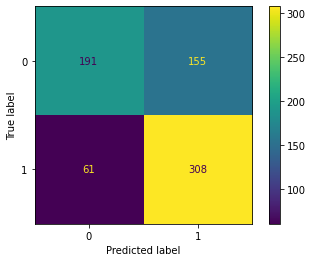

In [25]:
disp.plot()

plt.show()

In [26]:
#misclassified ypredicted
count_misclassified = (y_test != y_pred).sum()

In [27]:
count_misclassified

216

In [28]:
#training data score
clf.score(X_train, y_train)

0.9147286821705426

In [29]:
#test data score
clf.score(X_test, y_test)

0.6979020979020979

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64       346
           1       0.67      0.83      0.74       369

    accuracy                           0.70       715
   macro avg       0.71      0.69      0.69       715
weighted avg       0.71      0.70      0.69       715



In [118]:
clf.coef_

array([[-10.441033  , -10.03556789, -11.13418018, ..., -10.441033  ,
        -11.13418018, -10.441033  ]])

In [95]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(clf, X_train, y_train, cv=5, scoring=mse)

In [96]:
cv_5_results

array([0.27816901, 0.25880282, 0.27816901, 0.2627866 , 0.2292769 ])

In [103]:
cv_results = cross_val_score(clf, X_train, y_train, cv=5)

In [109]:
cv_results

array([0.72183099, 0.74119718, 0.72183099, 0.7372134 , 0.7707231 ])

In [106]:
cv_test_results = cross_val_score(clf, X_test, y_test, cv=5)

In [110]:
cv_test_results

array([0.67832168, 0.68531469, 0.69230769, 0.6993007 , 0.65034965])

In [31]:
from sklearn.feature_extraction.text import CountVectorizer


print("Vocabulary : ",count_vector.vocabulary_)

Vocabulary :  {'said': 7527, 'felt': 3275, 'way': 9575, 'suggeted': 8492, 'go': 3756, 'rest': 7311, 'trigger': 9038, 'ahead': 226, 'hypocondriac': 4286, 'like': 5057, 'decide': 2152, 'look': 5146, 'feeling': 3268, 'doom': 2580, 'hope': 4176, 'maybe': 5335, 'getting': 3709, 'sucked': 8469, 'rabbit': 6881, 'hole': 4135, 'ludicrous': 5195, 'conspiracy': 1776, 'stupid': 8429, 'psychic': 6772, 'test': 8743, 'new': 5755, 'age': 198, 'something': 8077, 'could': 1899, 'even': 3016, 'laugh': 4947, 'road': 7421, 'ended': 2879, 'reading': 6977, 'sense': 7706, 'indicative': 4445, 'various': 9377, 'health': 4025, 'ailment': 229, 'one': 5948, 'prone': 6724, 'top': 8924, 'gloom': 3749, 'worried': 9778, 'heart': 4036, 'happen': 3964, 'physical': 6351, 'hour': 4219, 'hey': 4088, 'assistance': 536, 'sure': 8539, 'right': 7395, 'place': 6394, 'post': 6513, 'currently': 2055, 'student': 8414, 'intern': 4607, 'sandia': 7541, 'national': 5682, 'lab': 4893, 'working': 9771, 'survey': 8555, 'help': 4066, 'imp

In [32]:
print("features : ",count_vector.get_feature_names())

features :  ['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abortion', 'abound', 'abrasive', 'abridged', 'abroad', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absolve', 'absorbed', 'absorbing', 'abstinence', 'abstract', 'absurd', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'abut', 'abyss', 'ac', 'academic', 'academy', 'acap', 'accelerated', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessory', 'accident', 'accidental', 'accidentally', 'accidentalsuicide', 'acclamation', 'accommodate', 'accommodation', 'accomodation', 'accompanied', 'accomplish', 'accomplishing', 'accomplishment', 'according', 'account', 'accountable', 'accurate', 'accurately', 'accusation', 'accusatory', 'accuse', 'accused', 'accuses', 'accusing', 'ace', 'achalasia', 'ache', 'achieve', 'achievement', 'achilles', 'acid', 'acidentaly', 'acknowledge', 'acknowledged', 'acknowledges

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logreg = LogisticRegression(random_state=0)

In [35]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [36]:
predictions = logreg.predict(X_test)

In [37]:
#training score
logreg.score(X_train, y_train)

0.9950669485553206

In [38]:
#test score
logreg.score(X_test, y_test)

0.7048951048951049

In [39]:
count_misclassified = (y_test != predictions).sum()

In [40]:
count_misclassified

211

## Topic Model

In [41]:
from sklearn.decomposition import NMF

In [42]:
topic_model = NMF(n_components = 10)
topic_model.fit(X_train)

NMF(n_components=10)

In [43]:
W = topic_model.fit_transform(X_train)
H = topic_model.components_

In [44]:
for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([count_vector.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['aa', 'abandonment', 'abandon', 'abhorrent', 'abandoned', 'ability', 'abandoning', 'abb', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1
['aa', 'aaand', 'abandonment', 'ability', 'abd', 'abhorrent', 'abandon', 'abandoning', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #2
['abb', 'abd', 'ability', 'abhorrent', 'abandonment', 'abandoned', 'aaand', 'abandoning', 'aa', 'abandon']


THE TOP 10 WORDS FOR TOPIC #3
['abandon', 'abandoned', 'abb', 'ability', 'abd', 'aa', 'abandoning', 'abandonment', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #4
['abhorrent', 'ability', 'abandon', 'abandoned', 'abandonment', 'abb', 'abandoning', 'abd', 'aaand', 'aa']


THE TOP 10 WORDS FOR TOPIC #5
['aaand', 'abandon', 'abandoned', 'abb', 'ability', 'abandonment', 'abd', 'aa', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #6
['aaand', 'abandon', 'ability', 'abandoning', 'abb', 'abandoned', 'aa', 'abhorrent', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC 

['aa', 'abandonment', 'abb', 'abandoned', 'abhorrent', 'abd', 'ability', 'aaand', 'abandoning', 'abandon']


THE TOP 10 WORDS FOR TOPIC #60
['aaand', 'abandon', 'abb', 'abhorrent', 'abandoning', 'ability', 'abandonment', 'aa', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #61
['aaand', 'abandoning', 'abandonment', 'ability', 'abandoned', 'abandon', 'abhorrent', 'abb', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #62
['aa', 'abandoned', 'abd', 'abhorrent', 'abb', 'ability', 'abandon', 'abandonment', 'abandoning', 'aaand']


THE TOP 10 WORDS FOR TOPIC #63
['aaand', 'abandonment', 'abb', 'abhorrent', 'abandoning', 'abandoned', 'abandon', 'abd', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #64
['aa', 'abandonment', 'aaand', 'abd', 'abandoned', 'abb', 'abhorrent', 'ability', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #65
['aa', 'abandoned', 'abandonment', 'abhorrent', 'ability', 'aaand', 'abandoning', 'abb', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #66
['aa', 'aaand', 'aba

['aa', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'aaand', 'abd', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #124
['aaand', 'abandoned', 'abb', 'abd', 'abhorrent', 'abandonment', 'aa', 'ability', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #125
['aa', 'abandon', 'abandoned', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #126
['aaand', 'abandon', 'abandoning', 'abandonment', 'abb', 'ability', 'aa', 'abhorrent', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #127
['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'ability', 'abandoning', 'abd', 'aaand', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #128
['abandoned', 'abandoning', 'abandonment', 'abb', 'ability', 'abhorrent', 'aaand', 'abd', 'abandon', 'aa']


THE TOP 10 WORDS FOR TOPIC #129
['abandon', 'abandoning', 'abb', 'abandoned', 'abandonment', 'ability', 'aa', 'abd', 'aaand', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #130
['abandoning'

['abandoning', 'abandonment', 'abb', 'abandon', 'abd', 'ability', 'abhorrent', 'aa', 'abandoned', 'aaand']


THE TOP 10 WORDS FOR TOPIC #187
['abandon', 'aaand', 'abandoning', 'abandoned', 'abhorrent', 'abd', 'aa', 'abb', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #188
['aa', 'aaand', 'abandoning', 'abb', 'abhorrent', 'abandon', 'ability', 'abd', 'abandoned', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #189
['aaand', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandon', 'aa', 'abd', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #190
['abandon', 'abandoning', 'abhorrent', 'ability', 'abb', 'abandoned', 'aa', 'aaand', 'abandonment', 'abd']


THE TOP 10 WORDS FOR TOPIC #191
['aaand', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandon', 'abandonment', 'abd', 'ability', 'aa']


THE TOP 10 WORDS FOR TOPIC #192
['aa', 'aaand', 'abandoned', 'abb', 'ability', 'abd', 'abandoning', 'abandon', 'abandonment', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #193
['aaand', 'ab

['abandon', 'abandoning', 'abb', 'ability', 'aaand', 'abandoned', 'abandonment', 'abhorrent', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #253
['aa', 'abandonment', 'abb', 'abhorrent', 'abandoned', 'ability', 'aaand', 'abd', 'abandoning', 'abandon']


THE TOP 10 WORDS FOR TOPIC #254
['aa', 'aaand', 'abandoned', 'abb', 'ability', 'abandonment', 'abhorrent', 'abandon', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #255
['aa', 'aaand', 'abandon', 'abandonment', 'abb', 'abhorrent', 'abandoned', 'abd', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #256
['aa', 'abandon', 'abandoned', 'abandonment', 'abhorrent', 'abandoning', 'abb', 'ability', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #257
['aa', 'aaand', 'abandoned', 'abhorrent', 'abd', 'abb', 'ability', 'abandonment', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #258
['abandoned', 'abandonment', 'abb', 'ability', 'abandon', 'abandoning', 'abd', 'abhorrent', 'aaand', 'aa']


THE TOP 10 WORDS FOR TOPIC #259
['aa', 'aband

['aa', 'aaand', 'abandoned', 'abhorrent', 'ability', 'abandon', 'abandoning', 'abd', 'abb', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #317
['aa', 'abandonment', 'abhorrent', 'abb', 'aaand', 'abandoned', 'abandoning', 'ability', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #318
['abandon', 'abandonment', 'aaand', 'aa', 'abhorrent', 'abb', 'abd', 'abandoning', 'abandoned', 'ability']


THE TOP 10 WORDS FOR TOPIC #319
['abandoning', 'abhorrent', 'abandonment', 'abandoned', 'ability', 'abb', 'abd', 'aa', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #320
['abandonment', 'abb', 'abhorrent', 'ability', 'abandoning', 'abandon', 'aa', 'abandoned', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #321
['abandonment', 'abb', 'abd', 'ability', 'abandoning', 'abandoned', 'abandon', 'aaand', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #322
['aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abandonment', 'aa', 'abhorrent', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #323
['aa', 'aband

['abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'abd', 'aaand', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #380
['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #381
['aa', 'abandon', 'abandoned', 'abandoning', 'abhorrent', 'abb', 'abandonment', 'abd', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #382
['abandon', 'abandoning', 'abd', 'abb', 'abandoned', 'abhorrent', 'ability', 'aaand', 'aa', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #383
['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'abandoning', 'aaand', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #384
['abandoned', 'abb', 'abandoning', 'abandonment', 'ability', 'abandon', 'aaand', 'abhorrent', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #385
['aa', 'aaand', 'abandoning', 'abandoned', 'abb', 'abhorrent', 'abd', 'abandon', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #386
['aa', 'aband

['aa', 'abandon', 'abandoned', 'abandonment', 'abhorrent', 'abandoning', 'abd', 'abb', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #443
['abb', 'abandonment', 'abhorrent', 'abandoning', 'ability', 'abandoned', 'abd', 'aa', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #444
['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'ability', 'aaand', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #445
['abandoned', 'ability', 'aa', 'abd', 'abb', 'abandonment', 'abandoning', 'aaand', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #446
['aa', 'aaand', 'abd', 'abandonment', 'abandoning', 'abhorrent', 'ability', 'abb', 'abandoned', 'abandon']


THE TOP 10 WORDS FOR TOPIC #447
['aa', 'aaand', 'abandoned', 'abandonment', 'abb', 'abd', 'ability', 'abandon', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #448
['aaand', 'abandon', 'abandoned', 'abb', 'abd', 'ability', 'abandoning', 'abhorrent', 'abandonment', 'aa']


THE TOP 10 WORDS FOR TOPIC #449
['aaand', 'ab

['abandoned', 'abandoning', 'aa', 'abandonment', 'abandon', 'abd', 'abhorrent', 'aaand', 'ability', 'abb']


THE TOP 10 WORDS FOR TOPIC #509
['aaand', 'abandon', 'abandonment', 'abb', 'abhorrent', 'abd', 'aa', 'abandoned', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #510
['aa', 'abandoned', 'abandoning', 'abb', 'ability', 'abandon', 'abd', 'aaand', 'abandonment', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #511
['abandonment', 'abhorrent', 'abandoned', 'abandoning', 'aa', 'abandon', 'abd', 'abb', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #512
['aa', 'abandoned', 'aaand', 'abb', 'abandoning', 'abandon', 'abhorrent', 'ability', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #513
['ability', 'aaand', 'abb', 'abandonment', 'abandoning', 'abhorrent', 'aa', 'abd', 'abandon', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #514
['aaand', 'abb', 'abhorrent', 'abandoned', 'abandonment', 'abd', 'aa', 'abandoning', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #515
['aa', 'aband

['abandon', 'abhorrent', 'ability', 'abandoned', 'abb', 'aa', 'abandonment', 'abd', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #572
['abandon', 'abhorrent', 'aaand', 'abd', 'abandoned', 'aa', 'abb', 'ability', 'abandoning', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #573
['abandoned', 'abandoning', 'abandonment', 'aa', 'abandon', 'abhorrent', 'abb', 'ability', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #574
['aaand', 'abandoned', 'abandoning', 'abb', 'abandonment', 'abandon', 'abhorrent', 'ability', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #575
['abandon', 'abb', 'abandoning', 'abandoned', 'abhorrent', 'abandonment', 'ability', 'abd', 'aa', 'aaand']


THE TOP 10 WORDS FOR TOPIC #576
['abandonment', 'abb', 'abhorrent', 'abd', 'abandoned', 'aa', 'abandon', 'ability', 'abandoning', 'aaand']


THE TOP 10 WORDS FOR TOPIC #577
['abandoned', 'abandonment', 'ability', 'abandon', 'aa', 'abd', 'abb', 'abandoning', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #578
['ability', '

['aa', 'abhorrent', 'abandonment', 'abandoned', 'abb', 'ability', 'aaand', 'abd', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #635
['aaand', 'abandoning', 'abb', 'abd', 'abhorrent', 'ability', 'abandon', 'aa', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #636
['aa', 'abandonment', 'abb', 'abd', 'ability', 'abandoning', 'aaand', 'abhorrent', 'abandon', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #637
['abb', 'aaand', 'abhorrent', 'abandon', 'abandonment', 'ability', 'aa', 'abandoned', 'abandoning', 'abd']


THE TOP 10 WORDS FOR TOPIC #638
['aa', 'abandoned', 'abhorrent', 'abd', 'abandoning', 'abb', 'ability', 'abandon', 'abandonment', 'aaand']


THE TOP 10 WORDS FOR TOPIC #639
['aa', 'aaand', 'abandon', 'abandoned', 'abhorrent', 'abb', 'abandoning', 'abandonment', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #640
['abandoned', 'abhorrent', 'ability', 'abb', 'aa', 'aaand', 'abandon', 'abandoning', 'abandonment', 'abd']


THE TOP 10 WORDS FOR TOPIC #641
['aa', 'aaand

['aaand', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandon', 'ability', 'aa', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #698
['abandoned', 'abandonment', 'abb', 'abd', 'ability', 'abandon', 'abandoning', 'aa', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #699
['aa', 'aaand', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'abandoned', 'ability', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #700
['aa', 'aaand', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'abandoned', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #701
['abandoned', 'abandonment', 'ability', 'aa', 'abandon', 'abandoning', 'abb', 'abd', 'aaand', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #702
['abandonment', 'ability', 'aaand', 'abb', 'abandoning', 'abandoned', 'abandon', 'aa', 'abhorrent', 'abd']


THE TOP 10 WORDS FOR TOPIC #703
['aa', 'abandon', 'abb', 'ability', 'abandoning', 'abhorrent', 'abd', 'aaand', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #704
['abandonment

['aaand', 'abandoned', 'abandoning', 'abandonment', 'abhorrent', 'abd', 'abb', 'aa', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #757
['aa', 'abandon', 'abandoned', 'abandonment', 'abd', 'abb', 'abhorrent', 'aaand', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #758
['aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'ability', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #759
['aa', 'abandonment', 'aaand', 'abandoning', 'abb', 'abandoned', 'abhorrent', 'abd', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #760
['aa', 'aaand', 'abandoning', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'abandon', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #761
['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abandonment', 'ability', 'abhorrent', 'abd']


THE TOP 10 WORDS FOR TOPIC #762
['abandon', 'abandonment', 'aa', 'abandoning', 'abhorrent', 'abandoned', 'abb', 'ability', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #763
['abandon', '

['aa', 'aaand', 'abandon', 'abandonment', 'abb', 'abandoned', 'abd', 'abhorrent', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #822
['abandon', 'abb', 'abd', 'abandoning', 'abandoned', 'abandonment', 'abhorrent', 'aa', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #823
['aaand', 'abb', 'abd', 'abhorrent', 'aa', 'ability', 'abandoned', 'abandon', 'abandoning', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #824
['aa', 'abandoned', 'abandonment', 'abhorrent', 'abandon', 'abb', 'aaand', 'ability', 'abandoning', 'abd']


THE TOP 10 WORDS FOR TOPIC #825
['aa', 'abandoned', 'abandoning', 'abd', 'abhorrent', 'aaand', 'abandonment', 'abb', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #826
['ability', 'abb', 'abandonment', 'abhorrent', 'abandoning', 'aa', 'abandoned', 'abd', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #827
['aa', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'aaand', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #828
['aaand', 'ab

['aaand', 'abhorrent', 'abandon', 'abandonment', 'abb', 'abd', 'abandoning', 'abandoned', 'ability', 'aa']


THE TOP 10 WORDS FOR TOPIC #885
['abandoned', 'abandoning', 'abb', 'abd', 'abhorrent', 'aa', 'ability', 'abandonment', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #886
['aa', 'abandoned', 'abandoning', 'abandonment', 'abhorrent', 'aaand', 'abandon', 'abd', 'abb', 'ability']


THE TOP 10 WORDS FOR TOPIC #887
['abandon', 'abandoning', 'abandonment', 'abhorrent', 'aa', 'abandoned', 'abd', 'aaand', 'abb', 'ability']


THE TOP 10 WORDS FOR TOPIC #888
['aa', 'aaand', 'abandoned', 'abandoning', 'abandonment', 'abb', 'ability', 'abhorrent', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #889
['aa', 'aaand', 'abandoning', 'abandonment', 'abb', 'abandoned', 'abandon', 'ability', 'abhorrent', 'abd']


THE TOP 10 WORDS FOR TOPIC #890
['abandon', 'abb', 'abandoned', 'abandoning', 'ability', 'abandonment', 'abd', 'aa', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #891
['aa', 'aaand

['abb', 'abandon', 'abandonment', 'abandoned', 'abandoning', 'abd', 'aa', 'aaand', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #947
['abandoning', 'abandoned', 'aa', 'aaand', 'ability', 'abb', 'abd', 'abandonment', 'abandon', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #948
['abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'aaand', 'aa', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #949
['abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'aaand', 'aa', 'abandonment', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #950
['aaand', 'abandon', 'abb', 'ability', 'aa', 'abhorrent', 'abandoning', 'abandoned', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #951
['abandon', 'abb', 'abd', 'abhorrent', 'aa', 'abandoned', 'ability', 'aaand', 'abandoning', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #952
['aa', 'abb', 'ability', 'aaand', 'abhorrent', 'abandoning', 'abandonment', 'abd', 'abandon', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #953
['abandon', '

['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'ability', 'abd', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1010
['abb', 'abandonment', 'abhorrent', 'abandoned', 'abandon', 'abandoning', 'aaand', 'ability', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #1011
['aa', 'abandoned', 'abandoning', 'aaand', 'abd', 'abb', 'ability', 'abhorrent', 'abandonment', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1012
['aa', 'aaand', 'abb', 'ability', 'abandoned', 'abandon', 'abandonment', 'abd', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1013
['aa', 'abandon', 'abandonment', 'abd', 'abb', 'abandoned', 'abhorrent', 'abandoning', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #1014
['aa', 'abb', 'ability', 'abhorrent', 'abandonment', 'abandoned', 'aaand', 'abd', 'abandoning', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1015
['aa', 'abandon', 'abandonment', 'abhorrent', 'abb', 'abandoning', 'abandoned', 'ability', 'aaand', 'abd']


THE TOP 10 WORDS FOR TOPIC #1016
['aa',

['abandoned', 'abandonment', 'abb', 'abhorrent', 'ability', 'abandon', 'aa', 'abd', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1074
['aa', 'abandoned', 'abandoning', 'abandon', 'abd', 'abb', 'abhorrent', 'aaand', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #1075
['aa', 'abandoned', 'abb', 'ability', 'abandonment', 'abhorrent', 'abd', 'aaand', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1076
['aaand', 'abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'abandoned', 'aa']


THE TOP 10 WORDS FOR TOPIC #1077
['abandonment', 'abhorrent', 'aa', 'aaand', 'abandoned', 'abb', 'ability', 'abandon', 'abandoning', 'abd']


THE TOP 10 WORDS FOR TOPIC #1078
['abandoned', 'abandoning', 'abb', 'abd', 'abandon', 'abandonment', 'aaand', 'aa', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1079
['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abd', 'abhorrent', 'ability', 'abb', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1080
['aban


THE TOP 10 WORDS FOR TOPIC #1137
['abb', 'abd', 'abandonment', 'abandoned', 'abandoning', 'aa', 'abandon', 'abhorrent', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #1138
['aa', 'aaand', 'abandoned', 'abandonment', 'abandon', 'abandoning', 'abb', 'abd', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #1139
['abandon', 'abandoned', 'abandonment', 'abb', 'ability', 'abhorrent', 'aa', 'abd', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1140
['aa', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'abandon', 'aaand', 'abd', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1141
['aa', 'abandoned', 'abandon', 'abandonment', 'aaand', 'ability', 'abhorrent', 'abandoning', 'abb', 'abd']


THE TOP 10 WORDS FOR TOPIC #1142
['aaand', 'abandon', 'abandonment', 'abd', 'ability', 'abb', 'aa', 'abandoned', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1143
['abandoning', 'abandoned', 'abandonment', 'abandon', 'aaand', 'ability', 'abhorrent', 'abd', 'abb', 'aa']


THE T

['aa', 'aaand', 'abandonment', 'abb', 'abhorrent', 'abd', 'ability', 'abandoned', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1202
['abandoning', 'abandoned', 'abandonment', 'aaand', 'abhorrent', 'ability', 'aa', 'abb', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #1203
['aa', 'aaand', 'abandon', 'abb', 'abhorrent', 'ability', 'abandoned', 'abd', 'abandoning', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1204
['aa', 'abandoned', 'abandoning', 'abandonment', 'abhorrent', 'ability', 'abb', 'abandon', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1205
['aa', 'aaand', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'ability', 'abd', 'abandoning', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1206
['abb', 'abandon', 'abandonment', 'abandoned', 'aaand', 'abandoning', 'ability', 'aa', 'abhorrent', 'abd']


THE TOP 10 WORDS FOR TOPIC #1207
['aaand', 'abandon', 'abd', 'abhorrent', 'ability', 'aa', 'abb', 'abandoned', 'abandoning', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1208
['aaan

['abandon', 'ability', 'abhorrent', 'aa', 'abandonment', 'abandoned', 'aaand', 'abandoning', 'abb', 'abd']


THE TOP 10 WORDS FOR TOPIC #1266
['aa', 'abandoned', 'abandoning', 'abandonment', 'abd', 'abandon', 'aaand', 'abb', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1267
['abandonment', 'aaand', 'abandoning', 'aa', 'abandoned', 'abb', 'ability', 'abhorrent', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #1268
['abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'aa', 'aaand', 'abd', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1269
['abandon', 'abandoning', 'abhorrent', 'aa', 'abandonment', 'abd', 'abb', 'ability', 'aaand', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1270
['aa', 'aaand', 'abandonment', 'abd', 'abb', 'abhorrent', 'abandon', 'abandoned', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #1271
['abandonment', 'abandoned', 'abandon', 'abb', 'abandoning', 'abd', 'aaand', 'aa', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1272
['aa',

['abandon', 'abb', 'abhorrent', 'abandoning', 'aa', 'abd', 'abandonment', 'abandoned', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #1329
['abandoning', 'abb', 'aa', 'aaand', 'abd', 'abhorrent', 'ability', 'abandonment', 'abandon', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1330
['aaand', 'abandoning', 'abandonment', 'abd', 'abhorrent', 'ability', 'abandoned', 'abandon', 'aa', 'abb']


THE TOP 10 WORDS FOR TOPIC #1331
['aa', 'aaand', 'abhorrent', 'abb', 'abandoning', 'abandoned', 'ability', 'abd', 'abandon', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1332
['abandon', 'abandoned', 'abb', 'abhorrent', 'ability', 'abandoning', 'abd', 'aaand', 'aa', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1333
['aaand', 'abb', 'abhorrent', 'abandonment', 'aa', 'abandoning', 'abandoned', 'abd', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1334
['abandonment', 'abb', 'abandoned', 'aaand', 'abandon', 'abhorrent', 'aa', 'abd', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #1335
['aaan

['abandon', 'abandonment', 'abb', 'abd', 'ability', 'abhorrent', 'aa', 'abandoned', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1393
['aaand', 'abandoned', 'abandoning', 'abhorrent', 'abb', 'abandonment', 'aa', 'ability', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1394
['aaand', 'abandoned', 'abandoning', 'abandonment', 'ability', 'abb', 'abhorrent', 'abandon', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #1395
['abandoned', 'abandoning', 'abb', 'abhorrent', 'ability', 'abandon', 'abd', 'aa', 'abandonment', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1396
['aa', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'aaand', 'abandon', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1397
['abandoned', 'abb', 'ability', 'aa', 'abandon', 'abhorrent', 'abd', 'abandoning', 'abandonment', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1398
['aaand', 'abandoning', 'abhorrent', 'abandoned', 'abandonment', 'ability', 'abandon', 'abb', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #1399
['aa',

['aaand', 'abandoned', 'abandoning', 'abandonment', 'abd', 'abhorrent', 'aa', 'abb', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1456
['aa', 'abandonment', 'abb', 'abandoned', 'abandoning', 'abhorrent', 'abd', 'abandon', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1457
['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abd', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #1458
['aaand', 'abandonment', 'abd', 'ability', 'abandoning', 'abhorrent', 'abb', 'aa', 'abandoned', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1459
['aaand', 'abd', 'aa', 'ability', 'abb', 'abandoning', 'abandoned', 'abandon', 'abandonment', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1460
['abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'ability', 'aaand', 'aa', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1461
['aa', 'aaand', 'abandoned', 'abandoning', 'abandonment', 'abd', 'abb', 'abhorrent', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1462
['aban

['aaand', 'abandon', 'abandonment', 'abb', 'abhorrent', 'ability', 'abandoning', 'abandoned', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #1517
['aa', 'aaand', 'abhorrent', 'abandoning', 'ability', 'abandonment', 'abandoned', 'abb', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1518
['abhorrent', 'abandonment', 'aaand', 'abandoning', 'abd', 'aa', 'abb', 'abandon', 'abandoned', 'ability']


THE TOP 10 WORDS FOR TOPIC #1519
['aa', 'aaand', 'abb', 'abandon', 'abandonment', 'abhorrent', 'ability', 'abd', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1520
['aa', 'abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'abandoned', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1521
['abandonment', 'abd', 'aa', 'ability', 'abandon', 'abandoned', 'aaand', 'abandoning', 'abhorrent', 'abb']


THE TOP 10 WORDS FOR TOPIC #1522
['abandon', 'abandoned', 'abb', 'abandonment', 'aa', 'abhorrent', 'abandoning', 'aaand', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #1523
['abb'

['abandon', 'abb', 'abandoning', 'aaand', 'abhorrent', 'abandonment', 'ability', 'abandoned', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #1579
['abandon', 'abandoning', 'abandonment', 'abb', 'ability', 'abhorrent', 'aa', 'abd', 'aaand', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1580
['abandon', 'abandoning', 'abb', 'abd', 'abhorrent', 'abandonment', 'ability', 'aa', 'abandoned', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1581
['aaand', 'abandon', 'abhorrent', 'ability', 'abandonment', 'aa', 'abb', 'abandoned', 'abandoning', 'abd']


THE TOP 10 WORDS FOR TOPIC #1582
['aa', 'aaand', 'abandonment', 'abhorrent', 'ability', 'abb', 'abd', 'abandoning', 'abandon', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1583
['abhorrent', 'abandonment', 'abb', 'abandoned', 'abd', 'abandon', 'abandoning', 'aa', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #1584
['aaand', 'abd', 'abandoned', 'abb', 'abandoning', 'abandon', 'aa', 'ability', 'abhorrent', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1585
['aban

['abandoned', 'abandoning', 'abb', 'abhorrent', 'aaand', 'abandonment', 'abandon', 'ability', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #1642
['abandon', 'abandoning', 'ability', 'abb', 'abandoned', 'abhorrent', 'abd', 'aa', 'aaand', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1643
['aa', 'aaand', 'abhorrent', 'abandonment', 'abandoned', 'abd', 'ability', 'abb', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1644
['abandoned', 'abandonment', 'abb', 'abhorrent', 'ability', 'abandon', 'abandoning', 'aa', 'aaand', 'abd']


THE TOP 10 WORDS FOR TOPIC #1645
['abandoned', 'abb', 'abhorrent', 'abandonment', 'aaand', 'abandon', 'ability', 'abd', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1646
['aa', 'abandoning', 'abd', 'abandoned', 'abhorrent', 'abandon', 'ability', 'abb', 'aaand', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1647
['abandoned', 'abb', 'abandoning', 'abhorrent', 'abandon', 'abandonment', 'abd', 'aaand', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #1648
['aa',

['aaand', 'abd', 'abandoned', 'abandonment', 'abandoning', 'abhorrent', 'ability', 'abb', 'aa', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1700
['aaand', 'abandoning', 'abb', 'abandoned', 'abhorrent', 'abandonment', 'aa', 'abandon', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #1701
['abandoning', 'abhorrent', 'ability', 'abandoned', 'abandonment', 'aa', 'abd', 'abandon', 'abb', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1702
['abandon', 'abandonment', 'abb', 'aa', 'abandoned', 'abhorrent', 'abd', 'ability', 'abandoning', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1703
['aaand', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #1704
['abandoned', 'abd', 'abhorrent', 'abandonment', 'aa', 'abandon', 'aaand', 'abb', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1705
['aa', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'abandoned', 'abandoning', 'abandon', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1706
['aban

['aa', 'aaand', 'abb', 'abhorrent', 'abandon', 'abandoned', 'ability', 'abandonment', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1758
['abandonment', 'abhorrent', 'aa', 'abandoning', 'abandoned', 'abd', 'ability', 'abandon', 'abb', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1759
['aaand', 'aa', 'abandonment', 'abandon', 'ability', 'abandoned', 'abd', 'abhorrent', 'abb', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1760
['abandoned', 'abandoning', 'abb', 'abhorrent', 'aaand', 'abandonment', 'aa', 'abd', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #1761
['abandonment', 'abd', 'abandon', 'aaand', 'ability', 'abandoned', 'aa', 'abb', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1762
['aaand', 'abandonment', 'abd', 'abhorrent', 'abandoning', 'abandon', 'aa', 'abb', 'ability', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1763
['aaand', 'abandon', 'abandoning', 'abb', 'abhorrent', 'ability', 'aa', 'abandoned', 'abandonment', 'abd']


THE TOP 10 WORDS FOR TOPIC #1764
['aban

['aaand', 'abb', 'abhorrent', 'abandoned', 'abandoning', 'abandonment', 'aa', 'abd', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #1821
['abandon', 'abandoning', 'abb', 'abandoned', 'abhorrent', 'aa', 'abd', 'aaand', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #1822
['abandoned', 'abb', 'abhorrent', 'abandonment', 'abandoning', 'aa', 'abandon', 'aaand', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #1823
['aa', 'aaand', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'abandoned', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1824
['aaand', 'abandonment', 'abandon', 'abandoning', 'abandoned', 'abd', 'ability', 'abhorrent', 'abb', 'aa']


THE TOP 10 WORDS FOR TOPIC #1825
['abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'ability', 'abhorrent', 'aaand', 'aa', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1826
['abandon', 'abandoned', 'abandoning', 'abhorrent', 'aa', 'abb', 'aaand', 'ability', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1827
['aaan

['aa', 'aaand', 'abandonment', 'abhorrent', 'abd', 'abandoning', 'abandon', 'abb', 'abandoned', 'ability']


THE TOP 10 WORDS FOR TOPIC #1884
['aa', 'aaand', 'abandon', 'abd', 'abhorrent', 'ability', 'abandoned', 'abandoning', 'abandonment', 'abb']


THE TOP 10 WORDS FOR TOPIC #1885
['aaand', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'ability', 'abb', 'abd', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1886
['aaand', 'abandon', 'abandoning', 'abb', 'ability', 'abandonment', 'abandoned', 'aa', 'abd', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1887
['abandonment', 'abb', 'aa', 'abandoned', 'abandoning', 'abandon', 'abhorrent', 'abd', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1888
['aa', 'abandon', 'abandoning', 'abd', 'abhorrent', 'abandonment', 'abb', 'aaand', 'ability', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1889
['abandoning', 'abandonment', 'abandoned', 'aa', 'abhorrent', 'abb', 'aaand', 'ability', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #1890
['aban

['aa', 'aaand', 'abandonment', 'abb', 'abandoned', 'abandon', 'abd', 'ability', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1947
['abandonment', 'abandoning', 'abandon', 'abandoned', 'abb', 'abhorrent', 'aaand', 'ability', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #1948
['aaand', 'abandoned', 'abb', 'abandonment', 'abandon', 'abhorrent', 'abandoning', 'ability', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #1949
['abandon', 'abandoning', 'abandonment', 'abb', 'ability', 'aaand', 'abandoned', 'abhorrent', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #1950
['abd', 'ability', 'aa', 'aaand', 'abandonment', 'abandoning', 'abb', 'abhorrent', 'abandoned', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1951
['aaand', 'abandonment', 'abandon', 'abd', 'abhorrent', 'abb', 'ability', 'abandoned', 'abandoning', 'aa']


THE TOP 10 WORDS FOR TOPIC #1952
['abandonment', 'abhorrent', 'abandon', 'abb', 'aaand', 'abandoned', 'ability', 'abandoning', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #1953
['aban

['abandon', 'abandonment', 'abandoning', 'abandoned', 'aaand', 'aa', 'ability', 'abhorrent', 'abb', 'abd']


THE TOP 10 WORDS FOR TOPIC #2009
['abandon', 'abandonment', 'abb', 'abd', 'ability', 'aa', 'abandoning', 'abhorrent', 'aaand', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #2010
['aa', 'ability', 'abandon', 'abandoned', 'abhorrent', 'abb', 'abandoning', 'abd', 'abandonment', 'aaand']


THE TOP 10 WORDS FOR TOPIC #2011
['aa', 'abhorrent', 'abandoning', 'abb', 'abd', 'aaand', 'ability', 'abandonment', 'abandoned', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2012
['aa', 'abandon', 'abandoning', 'abandonment', 'abb', 'ability', 'abd', 'aaand', 'abhorrent', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #2013
['aaand', 'abandon', 'abb', 'abhorrent', 'abandoning', 'abandonment', 'abandoned', 'aa', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #2014
['aa', 'aaand', 'abandonment', 'abhorrent', 'abandoning', 'abandoned', 'ability', 'abandon', 'abb', 'abd']


THE TOP 10 WORDS FOR TOPIC #2015
['aban

['aa', 'abandoning', 'abd', 'abhorrent', 'abandoned', 'abb', 'ability', 'abandon', 'aaand', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #2071
['aaand', 'abandon', 'ability', 'abandoning', 'abandonment', 'abhorrent', 'abd', 'abb', 'aa', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #2072
['aa', 'abandonment', 'abd', 'abandon', 'abb', 'abandoning', 'abhorrent', 'abandoned', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #2073
['aa', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'aaand', 'ability', 'abandonment', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #2074
['abandonment', 'aaand', 'abhorrent', 'abandon', 'abandoning', 'aa', 'ability', 'abb', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #2075
['aa', 'abandon', 'abd', 'abandonment', 'abb', 'aaand', 'ability', 'abhorrent', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #2076
['aaand', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'ability', 'abhorrent', 'abandon', 'aa']


THE TOP 10 WORDS FOR TOPIC #2077
['aban

['aa', 'abandonment', 'abandoned', 'abandoning', 'abandon', 'abb', 'aaand', 'ability', 'abd', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #2139
['aa', 'aaand', 'abandon', 'abandoned', 'abandonment', 'abd', 'ability', 'abb', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #2140
['aa', 'aaand', 'abandon', 'abhorrent', 'ability', 'abandonment', 'abandoned', 'abb', 'abandoning', 'abd']


THE TOP 10 WORDS FOR TOPIC #2141
['abandon', 'abandoning', 'aa', 'aaand', 'abhorrent', 'ability', 'abb', 'abandonment', 'abandoned', 'abd']


THE TOP 10 WORDS FOR TOPIC #2142
['abandoning', 'abhorrent', 'abandon', 'abandonment', 'abb', 'aaand', 'abandoned', 'abd', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #2143
['aa', 'aaand', 'abandonment', 'abd', 'abhorrent', 'abandoned', 'abandoning', 'abandon', 'abb', 'ability']


THE TOP 10 WORDS FOR TOPIC #2144
['aa', 'aaand', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'ability', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2145
['aaan

['abandon', 'abandoned', 'abb', 'ability', 'aa', 'abhorrent', 'abd', 'abandonment', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #2202
['aaand', 'abandon', 'abandonment', 'ability', 'abandoned', 'abhorrent', 'abb', 'abd', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #2203
['aaand', 'abandon', 'abb', 'abhorrent', 'ability', 'abandonment', 'abandoning', 'abandoned', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #2204
['aa', 'aaand', 'abandoning', 'abb', 'ability', 'abandoned', 'abhorrent', 'abandonment', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2205
['abandoned', 'abandonment', 'aa', 'abandon', 'abhorrent', 'abb', 'abandoning', 'aaand', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #2206
['aa', 'abandon', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'abandoned', 'ability', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #2207
['aa', 'abandoned', 'abb', 'abhorrent', 'abandonment', 'abandoning', 'ability', 'aaand', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2208
['aban

['aa', 'abandoned', 'abb', 'ability', 'abhorrent', 'aaand', 'abd', 'abandoning', 'abandon', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #2265
['aa', 'abandoned', 'abandoning', 'ability', 'abandon', 'abb', 'aaand', 'abd', 'abhorrent', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #2266
['abandon', 'abandoned', 'abandonment', 'abhorrent', 'abd', 'ability', 'aaand', 'abandoning', 'abb', 'aa']


THE TOP 10 WORDS FOR TOPIC #2267
['abandoned', 'abandoning', 'abandonment', 'ability', 'aaand', 'abhorrent', 'abd', 'abb', 'aa', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2268
['aa', 'aaand', 'abb', 'abhorrent', 'ability', 'abandoned', 'abandoning', 'abd', 'abandon', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #2269
['aaand', 'abandon', 'abb', 'abandoning', 'ability', 'abhorrent', 'abandoned', 'abd', 'aa', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #2270
['aa', 'abandoning', 'abandonment', 'abb', 'abd', 'ability', 'aaand', 'abhorrent', 'abandoned', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2271
['aa',

['abandon', 'abandonment', 'abb', 'aa', 'ability', 'abandoned', 'aaand', 'abhorrent', 'abandoning', 'abd']


THE TOP 10 WORDS FOR TOPIC #2328
['abandon', 'abb', 'abhorrent', 'abd', 'abandonment', 'aa', 'abandoned', 'abandoning', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #2329
['aa', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'ability', 'aaand', 'abandonment', 'abd']


THE TOP 10 WORDS FOR TOPIC #2330
['aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'aa', 'ability', 'abandonment', 'abd']


THE TOP 10 WORDS FOR TOPIC #2331
['aa', 'aaand', 'abandoned', 'abd', 'abb', 'abhorrent', 'ability', 'abandoning', 'abandonment', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2332
['aaand', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'abd', 'aa', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #2333
['aaand', 'abandonment', 'abb', 'abandoned', 'abd', 'abhorrent', 'abandoning', 'aa', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2334
['aa',

['abb', 'aa', 'abhorrent', 'abandoned', 'ability', 'aaand', 'abandon', 'abd', 'abandonment', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #2391
['aa', 'aaand', 'abandoned', 'abb', 'abhorrent', 'abandoning', 'abandonment', 'ability', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #2392
['abandon', 'abb', 'aa', 'abandoned', 'abd', 'abhorrent', 'abandoning', 'abandonment', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #2393
['aa', 'aaand', 'abandoning', 'abb', 'abd', 'abandoned', 'ability', 'abandonment', 'abandon', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #2394
['abd', 'ability', 'abandon', 'abandonment', 'abandoned', 'abb', 'aaand', 'aa', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #2395
['abandonment', 'abandoning', 'abhorrent', 'aa', 'abandoned', 'abd', 'ability', 'aaand', 'abb', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2396
['aaand', 'abandoned', 'abandonment', 'abhorrent', 'abd', 'abb', 'aa', 'abandon', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #2397
['aa',

['abb', 'ability', 'abandonment', 'abandoned', 'aa', 'abhorrent', 'abandon', 'abd', 'abandoning', 'aaand']


THE TOP 10 WORDS FOR TOPIC #2454
['aa', 'abandoning', 'abb', 'aaand', 'abandonment', 'abandoned', 'ability', 'abd', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2455
['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abd', 'abhorrent', 'ability', 'abandonment', 'abb']


THE TOP 10 WORDS FOR TOPIC #2456
['abandon', 'abandoned', 'abandonment', 'abb', 'aa', 'abhorrent', 'aaand', 'abandoning', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #2457
['abandonment', 'abandoning', 'abhorrent', 'aa', 'ability', 'abd', 'abb', 'aaand', 'abandoned', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2458
['aa', 'abandoned', 'abandonment', 'abd', 'abandoning', 'abb', 'ability', 'abhorrent', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2459
['aaand', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'abd', 'ability', 'abandon', 'aa']


THE TOP 10 WORDS FOR TOPIC #2460
['aaan

['abandon', 'abb', 'ability', 'abhorrent', 'abd', 'abandoned', 'aa', 'aaand', 'abandonment', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #2517
['aaand', 'abandon', 'abb', 'abandoning', 'aa', 'abandonment', 'ability', 'abhorrent', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #2518
['abb', 'abhorrent', 'abandonment', 'ability', 'aa', 'abandoned', 'aaand', 'abandoning', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #2519
['abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'abandoned', 'aa', 'aaand', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #2520
['abb', 'abandonment', 'abandoning', 'aa', 'abandoned', 'abandon', 'abhorrent', 'abd', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #2521
['abd', 'abhorrent', 'ability', 'abandonment', 'aa', 'abandon', 'abandoning', 'abandoned', 'aaand', 'abb']


THE TOP 10 WORDS FOR TOPIC #2522
['aaand', 'abandonment', 'abb', 'aa', 'abhorrent', 'abandoned', 'abandon', 'abandoning', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #2523
['aban

['aaand', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'aa', 'abhorrent', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #2580
['abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'aaand', 'ability', 'aa']


THE TOP 10 WORDS FOR TOPIC #2581
['aa', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'ability', 'abandon', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #2582
['abb', 'ability', 'aaand', 'abandoning', 'abandonment', 'abandoned', 'abd', 'abandon', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #2583
['aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'abd', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #2584
['aa', 'aaand', 'abandon', 'abb', 'abhorrent', 'abandonment', 'abandoned', 'abandoning', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #2585
['abandonment', 'abhorrent', 'abandon', 'abandoned', 'abandoning', 'abd', 'ability', 'abb', 'aaand', 'aa']


THE TOP 10 WORDS FOR TOPIC #2586
['abb'

['aa', 'abandoned', 'abandoning', 'ability', 'abb', 'abandon', 'abhorrent', 'aaand', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #2643
['abandon', 'aa', 'aaand', 'abandoning', 'abandoned', 'abhorrent', 'abd', 'abb', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #2644
['aa', 'aaand', 'abandonment', 'abd', 'abhorrent', 'ability', 'abandoning', 'abb', 'abandoned', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2645
['abandon', 'abb', 'abhorrent', 'aa', 'aaand', 'abd', 'abandoned', 'abandonment', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #2646
['aa', 'abandon', 'abandoned', 'abandonment', 'ability', 'aaand', 'abb', 'abd', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #2647
['aaand', 'abandoned', 'abandoning', 'abhorrent', 'aa', 'ability', 'abb', 'abandon', 'abandonment', 'abd']


THE TOP 10 WORDS FOR TOPIC #2648
['aaand', 'abandonment', 'abandoning', 'abandoned', 'abd', 'abb', 'abhorrent', 'abandon', 'ability', 'aa']


THE TOP 10 WORDS FOR TOPIC #2649
['abb'

['aa', 'aaand', 'abandon', 'abandoned', 'abandonment', 'abhorrent', 'abb', 'abd', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #2704
['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abd', 'abhorrent', 'ability', 'abandonment', 'abb']


THE TOP 10 WORDS FOR TOPIC #2705
['aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'abd', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #2706
['aa', 'abandonment', 'abd', 'abandoning', 'abandoned', 'abb', 'aaand', 'ability', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2707
['abandonment', 'ability', 'abandoned', 'abhorrent', 'abb', 'aaand', 'abd', 'aa', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #2708
['aaand', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'aa', 'abandon', 'abandoning', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #2709
['aa', 'aaand', 'abandonment', 'abd', 'abhorrent', 'abb', 'abandoning', 'abandoned', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2710
['aa',

['abb', 'abandon', 'aaand', 'abandoning', 'abandonment', 'ability', 'abandoned', 'abhorrent', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #2763
['abandonment', 'abhorrent', 'abandoning', 'aa', 'ability', 'abd', 'abandon', 'aaand', 'abb', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #2764
['abandon', 'abandoning', 'abb', 'aaand', 'abandonment', 'abhorrent', 'aa', 'abandoned', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #2765
['aa', 'abandonment', 'aaand', 'abandoning', 'abandoned', 'abhorrent', 'abd', 'ability', 'abb', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2766
['aa', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'ability', 'abandonment', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #2767
['abhorrent', 'abandonment', 'abandoned', 'abandoning', 'abd', 'aaand', 'aa', 'abandon', 'ability', 'abb']


THE TOP 10 WORDS FOR TOPIC #2768
['aaand', 'abb', 'abandonment', 'abhorrent', 'aa', 'abandoning', 'abd', 'abandoned', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #2769
['aban

['aaand', 'abandon', 'abandoning', 'abandoned', 'abhorrent', 'abd', 'abb', 'ability', 'abandonment', 'aa']


THE TOP 10 WORDS FOR TOPIC #2826
['abb', 'abandoning', 'abandoned', 'abandon', 'aa', 'abhorrent', 'abd', 'aaand', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #2827
['aa', 'abandonment', 'abhorrent', 'aaand', 'abd', 'abandoning', 'abb', 'abandon', 'abandoned', 'ability']


THE TOP 10 WORDS FOR TOPIC #2828
['abandonment', 'abandon', 'abandoning', 'abandoned', 'ability', 'abhorrent', 'aaand', 'aa', 'abd', 'abb']


THE TOP 10 WORDS FOR TOPIC #2829
['abandon', 'abandoned', 'abandonment', 'abhorrent', 'ability', 'aaand', 'abandoning', 'abd', 'aa', 'abb']


THE TOP 10 WORDS FOR TOPIC #2830
['abandon', 'abandonment', 'abd', 'abhorrent', 'abandoning', 'abb', 'ability', 'abandoned', 'aaand', 'aa']


THE TOP 10 WORDS FOR TOPIC #2831
['abandoned', 'abb', 'abandonment', 'aaand', 'abandoning', 'abhorrent', 'abandon', 'aa', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #2832
['aa',

In [45]:
sort_train_df = df.sort_values(by =['label'])

In [46]:
sort_train_df

subreddit post_id sentence_range  \
1418     relationships  7tl21g       [35, 40]   
2242        assistance  9b2lg6         [0, 5]   
1150           anxiety  8bgm3i       (10, 15)   
2243              ptsd  8kquqf       [65, 70]   
1148     relationships  7sns1i       [10, 15]   
...                ...     ...            ...   
1236           anxiety  6rfma5         [0, 5]   
1233     relationships  7p5sr2       (20, 25)   
1232           anxiety  9y39cu        [5, 10]   
1229  domesticviolence  74k1gv        (5, 10)   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
1418  Be ready to contribute (reasonably). B - Calml...   2349      0   
2242  Hi reddit. I never thought I would need to pos...    717      0   
1150  I guess 15 years later and I haven't put being...  33955      0   
2243  He told me that I needed to be naked because h...     78      0   
1148  I have no problem with a few years either way,...   1097      0   
...                                                 ...    ...    ...   
1236  Hi r/anxiety, So lately my anxiety/hypochondri...   1227      1   
1233  I would like to have a relationship with his p...  41017      1   
1232  I want something that would help with a small ...    986      1   
1229  I think it was last year, we could hear the li...  16084      1   
2837  I was talking to my mom this morning and she s...    961      1   

      confidence  social_timestamp  social_karma  syntax_ari  ...  \
1418    0.571429        1517155607             3   11.805833  ...   
2242    0.800000        1535488908           261    5.080455  ...   
1150    0.666667        1523449175             2    2.552468  ...   
2243    0.571429        1526795378             1    0.909390  ...   
1148    0.666667        1516807357             2    1.505357  ...   
...          ...               ...           ...         ...  ...   
1236    1.000000        1501795340             1    5.892027  ...   
1233    0.600000        1515486584             0    5.942386  ...   
1232    0.800000        1542516123             2    5.587847  ...   
1229    0.800000        1507248318             6    7.690612  ...   
2837    0.571429        1488909516             2    0.835254  ...   

      lex_dal_min_activation  lex_dal_min_imagery  lex_dal_avg_activation  \
1418                  1.2857                  1.0                 1.80177   
2242                  1.0000                  1.0                 1.74638   
1150                  1.1818                  1.0                 1.72573   
2243                  1.1429                  1.0                 1.78543   
1148                  1.0000                  1.0                 1.60294   
...                      ...                  ...                     ...   
1236                  1.0000                  1.0                 1.77225   
1233                  1.1429                  1.0                 1.72791   
1232                  1.0000                  1.0                 1.81894   
1229                  1.1250                  1.0                 1.73689   
2837                  1.0000                  1.0                 1.68891   

      lex_dal_avg_imagery  lex_dal_avg_pleasantness  social_upvote_ratio  \
1418              1.47541                   1.89851                 0.72   
2242              1.61017                   1.87219                 0.95   
1150              1.51765                   1.93096                 1.00   
2243              1.78133                   1.90834                 0.67   
1148              1.47381                   1.80216                 0.67   
...                   ...                       ...                  ...   
1236              1.47812                   1.81956                 1.00   
1233              1.45897                   1.95198                 0.42   
1232              1.41839                   1.70938                 1.00   
1229              1.72593        

In [47]:
sort_train_df.reset_index(inplace = True)

In [48]:
sort_train_df

index         subreddit post_id sentence_range  \
0      1418     relationships  7tl21g       [35, 40]   
1      2242        assistance  9b2lg6         [0, 5]   
2      1150           anxiety  8bgm3i       (10, 15)   
3      2243              ptsd  8kquqf       [65, 70]   
4      1148     relationships  7sns1i       [10, 15]   
...     ...               ...     ...            ...   
2833   1236           anxiety  6rfma5         [0, 5]   
2834   1233     relationships  7p5sr2       (20, 25)   
2835   1232           anxiety  9y39cu        [5, 10]   
2836   1229  domesticviolence  74k1gv        (5, 10)   
2837   2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     Be ready to contribute (reasonably). B - Calml...   2349      0   
1     Hi reddit. I never thought I would need to pos...    717      0   
2     I guess 15 years later and I haven't put being...  33955      0   
3     He told me that I needed to be naked because h...     78      0   
4     I have no problem with a few years either way,...   1097      0   
...                                                 ...    ...    ...   
2833  Hi r/anxiety, So lately my anxiety/hypochondri...   1227      1   
2834  I would like to have a relationship with his p...  41017      1   
2835  I want something that would help with a small ...    986      1   
2836  I think it was last year, we could hear the li...  16084      1   
2837  I was talking to my mom this morning and she s...    961      1   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
0       0.571429        1517155607             3  ...                  1.2857   
1       0.800000        1535488908           261  ...                  1.0000   
2       0.666667        1523449175             2  ...                  1.1818   
3       0.571429        1526795378             1  ...                  1.1429   
4       0.666667        1516807357             2  ...                  1.0000   
...          ...               ...           ...  ...                     ...   
2833    1.000000        1501795340             1  ...                  1.0000   
2834    0.600000        1515486584             0  ...                  1.1429   
2835    0.800000        1542516123             2  ...                  1.0000   
2836    0.800000        1507248318             6  ...                  1.1250   
2837    0.571429        1488909516             2  ...                  1.0000   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
0                     1.0                 1.80177              1.47541   
1                     1.0                 1.74638              1.61017   
2                     1.0                 1.72573              1.51765   
3                     1.0                 1.78543              1.78133   
4                     1.0                 1.60294              1.47381   
...                   ...                     ...                  ...   
2833                  1.0                 1.77225              1.47812   
2834                  1.0                 1.72791              1.45897   
2835                  1.0                 1.81894              1.41839   
2836                  1.0                 1.73689              1.72593   
2837                  1.0                 1.68891              1.44615   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
0                      1.89851                 0.72                    2   
1                      1.87219                 0.95                   30   
2                      1.93096                 1.00                    3   
3                      1.90834                 0.67                    3   
4                      1.80216                 0.67                    7   
...                        ...                  ...                  ...   
2833                   1.81956                 1.00           

In [49]:
sort_train_df.iloc[[1349,1350], :]

index      subreddit post_id sentence_range  \
1349    646  relationships  7qoi8d       (50, 55)   
1350   2356       homeless  93wf83        [5, 10]   

                                                   text     id  label  \
1349  She'll order so much food, and binges on it, w...  47453      0   
1350  I work full time, but the money I'm spending j...   1679      1   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
1349         0.8        1516063515             1  ...                  1.1429   
1350         1.0        1533186372            15  ...                  1.0000   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
1349                  1.0                 1.73639              1.56226   
1350                  1.0                 1.68745              1.39077   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
1349                   1.85252                 1.00                    4   
1350                   1.86512                 0.84                   11   

      syntax_fk_grade  sentiment  \
1349         7.111250   0.174266   
1350         4.105333   0.387500   

                                         processed_text  
1349  she'll order much food binge downing shot whol...  
1350  work full time money i'm spending get preventi...  

[2 rows x 118 columns]

In [50]:
df_no_stress = sort_train_df.iloc[:1350, :]
df_stress = sort_train_df.iloc[1350:, :]
#Labels 1 = stress, 0 = no stress

In [51]:
df_no_stress


index      subreddit post_id sentence_range  \
0      1418  relationships  7tl21g       [35, 40]   
1      2242     assistance  9b2lg6         [0, 5]   
2      1150        anxiety  8bgm3i       (10, 15)   
3      2243           ptsd  8kquqf       [65, 70]   
4      1148  relationships  7sns1i       [10, 15]   
...     ...            ...     ...            ...   
1345   2543  relationships  7omn3j        (5, 10)   
1346    756           ptsd  6l1lwg         [0, 5]   
1347    764           ptsd  845jlg       [80, 85]   
1348    540           ptsd  7vpmvv         [0, 5]   
1349    646  relationships  7qoi8d       (50, 55)   

                                                   text     id  label  \
0     Be ready to contribute (reasonably). B - Calml...   2349      0   
1     Hi reddit. I never thought I would need to pos...    717      0   
2     I guess 15 years later and I haven't put being...  33955      0   
3     He told me that I needed to be naked because h...     78      0   
4     I have no problem with a few years either way,...   1097      0   
...                                                 ...    ...    ...   
1345  I started my seizure while on the stairs and a...  18802      0   
1346  It's been about a year and a half since the ev...    696      0   
1347  That could be defeated by National Post printi...    604      0   
1348  I sometimes call it "fight mode". Extensive ma...   1558      0   
1349  She'll order so much food, and binges on it, w...  47453      0   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
0       0.571429        1517155607             3  ...                  1.2857   
1       0.800000        1535488908           261  ...                  1.0000   
2       0.666667        1523449175             2  ...                  1.1818   
3       0.571429        1526795378             1  ...                  1.1429   
4       0.666667        1516807357             2  ...                  1.0000   
...          ...               ...           ...  ...                     ...   
1345    0.800000        1515279303           284  ...                  1.1250   
1346    1.000000        1499105719             5  ...                  1.1429   
1347    0.571429        1520958920            21  ...                  1.0000   
1348    0.571429        1517943583            23  ...                  1.1250   
1349    0.800000        1516063515             1  ...                  1.1429   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
0                     1.0                 1.80177              1.47541   
1                     1.0                 1.74638              1.61017   
2                     1.0                 1.72573              1.51765   
3                     1.0                 1.78543              1.78133   
4                     1.0                 1.60294              1.47381   
...                   ...                     ...                  ...   
1345                  1.0                 1.77756              1.52222   
1346                  1.0                 1.70826              1.52632   
1347                  1.0                 1.71164              1.56901   
1348                  1.0                 1.77194              1.62169   
1349                  1.0                 1.73639              1.56226   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
0                      1.89851                 0.72                    2   
1                      1.87219                 0.95                   30   
2                      1.93096                 1.00                    3   
3                      1.90834                 0.67                    3   
4                      1.80216                 0.67                    7   
...                        ...                  ...                  ...   
1345                   1.84242                 0.94                   24   
1346                  

In [52]:
df_stress


index         subreddit post_id sentence_range  \
1350   2356          homeless  93wf83        [5, 10]   
1351   2480  domesticviolence  6y2x5e       (50, 55)   
1352   2470              ptsd  6f8m81        [7, 12]   
1353   2335              ptsd  6gx7iv       (45, 50)   
1354   1998  domesticviolence  85clow        (5, 10)   
...     ...               ...     ...            ...   
2833   1236           anxiety  6rfma5         [0, 5]   
2834   1233     relationships  7p5sr2       (20, 25)   
2835   1232           anxiety  9y39cu        [5, 10]   
2836   1229  domesticviolence  74k1gv        (5, 10)   
2837   2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
1350  I work full time, but the money I'm spending j...   1679      1   
1351  I close the door and put my back against it. H...   9753      1   
1352  I loved this person dearly with all my heart, ...    245      1   
1353  Is it more than that? I have been considering ...  14077      1   
1354  I decided to park behind it to see what their ...  24346      1   
...                                                 ...    ...    ...   
2833  Hi r/anxiety, So lately my anxiety/hypochondri...   1227      1   
2834  I would like to have a relationship with his p...  41017      1   
2835  I want something that would help with a small ...    986      1   
2836  I think it was last year, we could hear the li...  16084      1   
2837  I was talking to my mom this morning and she s...    961      1   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
1350    1.000000        1533186372            15  ...                  1.0000   
1351    1.000000        1504556699             4  ...                  1.1429   
1352    0.800000        1496597983             2  ...                  1.1818   
1353    0.600000        1497323236             2  ...                  1.0000   
1354    0.666667        1521393567            10  ...                  1.2500   
...          ...               ...           ...  ...                     ...   
2833    1.000000        1501795340             1  ...                  1.0000   
2834    0.600000        1515486584             0  ...                  1.1429   
2835    0.800000        1542516123             2  ...                  1.0000   
2836    0.800000        1507248318             6  ...                  1.1250   
2837    0.571429        1488909516             2  ...                  1.0000   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
1350                  1.0                 1.68745              1.39077   
1351                  1.0                 1.69592              1.59726   
1352                  1.0                 1.73949              1.44762   
1353                  1.0                 1.68550              1.36333   
1354                  1.0                 1.74795              1.66774   
...                   ...                     ...                  ...   
2833                  1.0                 1.77225              1.47812   
2834                  1.0                 1.72791              1.45897   
2835                  1.0                 1.81894              1.41839   
2836                  1.0                 1.73689              1.72593   
2837                  1.0                 1.68891              1.44615   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
1350                   1.86512                 0.84                   11   
1351                   1.81069                 0.84                    9   
1352                   1.92359                 0.75                    4   
1353                   1.92084                 1.00                    3   
1354                   1.88536                 1.00                   17   
...                        ...                  ...                  ...   
2833                   1.81956                 1.00           

In [53]:
#df_no_stress
no_stress_text = [doc for doc in df_no_stress['text']]


In [54]:
#df_stress
stress_text = [doc for doc in df_stress['text']]

In [55]:
no_stress_processed_text = [preprocessing(doc) for doc in no_stress_text]

In [56]:
stress_processed_text = [preprocessing(doc) for doc in stress_text]

In [57]:
no_stress_processed_text

['ready contribute reasonably b calmly neutral negative vocabulary intonation express dissatisfaction certain behavior action outcome action politely ask repeat behavior action make sure particular outcome repeat make sure message audible comprehended necessary still calmly repeat ready calm reasonable discussion case decline c harsh sudden loud expression dissatisfaction',
 'hi reddit never thought would need post anything weekend tragedy struck people close heart request close family friend saturday night friend way home baby shower hit drunk driver previous duo suspended license',
 "guess year later put bullied high school behind probably doesnt help i'm unsecured body feel everyone judging i'm personal trainer lol sigh look fine par serious gym dweller work performance well personal training sale gig",
 'told needed naked wanted see sexy body said lot sexual thing took clothes naked exposed lying bed stomach head pillow flipped sat foot bed put pillow face time becomes blur giving 

In [58]:
stress_processed_text

["work full time money i'm spending get preventing saving get place get ahead i'm i've never spot always successful good life i'm idea sure i'm expecting post venting guess",
 "close door put back he's slamming door trying break yelling i'm crazy i'm making everything i'm terrified sobbing yelling help leave alone point i'm begging let get phone call dad come get finally tell can't wait gone",
 'loved person dearly heart extremly tragic sudden death want go doctor im already counceling ive gone next visit wednesday tell greif councellor thanks reading',
 'considering finally confessing secret feel like choking repress much bubble surface effect everything life thank listening reading need help need find right way deal approach',
 'decided park behind see business called saw copper stopper coming decided pull driveway unload kid go inside dealt strange people well deal one walking question followed child house',
 "go kind shit i'm violent suicidal hospital go really know seek help outsi

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
type(no_stress_processed_text)

list

In [61]:
vectorizer = TfidfVectorizer()

In [62]:
no_stress = vectorizer.fit_transform(no_stress_processed_text)

In [63]:
no_stress = no_stress.toarray()


In [64]:

vectorizer.get_feature_names()


['aa',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abb',
 'abd',
 'abhorrent',
 'ability',
 'able',
 'abrasive',
 'abridged',
 'abroad',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absorbing',
 'abstinence',
 'abuse',
 'abused',
 'abuser',
 'abusing',
 'abusive',
 'academic',
 'acap',
 'accelerated',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'accidentalsuicide',
 'accommodate',
 'accommodation',
 'accomodation',
 'accomplish',
 'accomplishment',
 'according',
 'account',
 'accountable',
 'accurately',
 'accusation',
 'accusatory',
 'accusing',
 'ace',
 'achalasia',
 'ache',
 'acid',
 'acknowledge',
 'acknowledges',
 'acquaintance',
 'acquire',
 'acre',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actionable',
 'activate',
 'activating',
 'activation',
 'active',
 'actively',
 'activity',
 'actual',
 'actually',
 'acute',
 

In [65]:
no_stress_topic_model = NMF(n_components = 10)
no_stress_topic_model.fit(no_stress)

NMF(n_components=10)

In [66]:
W = no_stress_topic_model.fit_transform(no_stress)
H = no_stress_topic_model.components_

# follow up questions- why is topic model only using first 10 words and adding them to 1350 indexes as the topic.

used tidfvector here and count vector way above

In [67]:
#why is this happening below? 



for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['abandon', 'abandoned', 'abandonment', 'abb', 'able', 'ability', 'abd', 'abandoning', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #1
['abandon', 'abandoned', 'abb', 'abd', 'abhorrent', 'aa', 'abandoning', 'abandonment', 'ability', 'able']


THE TOP 10 WORDS FOR TOPIC #2
['abandon', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abandoning', 'aa', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #3
['abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'able', 'aa', 'abd', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #4
['abandon', 'abandoning', 'abd', 'abhorrent', 'able', 'ability', 'abb', 'abandonment', 'aa', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #5
['abandon', 'abandoned', 'able', 'abd', 'abb', 'abandoning', 'aa', 'abandonment', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #6
['abandon', 'abandonment', 'abd', 'ability', 'abhorrent', 'aa', 'abandoning', 'abb', 'able', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #7
['ab

['abandoning', 'ability', 'abb', 'abandoned', 'aa', 'abandonment', 'abhorrent', 'able', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #60
['abandon', 'abandoning', 'abd', 'abb', 'abandonment', 'ability', 'able', 'abandoned', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #61
['abandon', 'abandoning', 'abd', 'aa', 'able', 'ability', 'abb', 'abandonment', 'abandoned', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #62
['abandon', 'abandoned', 'abb', 'abd', 'able', 'abandoning', 'aa', 'ability', 'abhorrent', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #63
['abandoned', 'abandoning', 'abhorrent', 'ability', 'able', 'abandonment', 'abd', 'abb', 'abandon', 'aa']


THE TOP 10 WORDS FOR TOPIC #64
['abandon', 'abandonment', 'abb', 'abd', 'able', 'abandoned', 'aa', 'abhorrent', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #65
['aa', 'abandon', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'able', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #66
['abb', 'abd', 'abhorrent',

['abandoning', 'ability', 'able', 'abhorrent', 'abd', 'abandoned', 'abb', 'aa', 'abandonment', 'abandon']


THE TOP 10 WORDS FOR TOPIC #131
['abandon', 'abd', 'ability', 'abb', 'able', 'abandoned', 'aa', 'abandonment', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #132
['abandonment', 'abb', 'abhorrent', 'abandon', 'abandoned', 'ability', 'abd', 'aa', 'abandoning', 'able']


THE TOP 10 WORDS FOR TOPIC #133
['abandoned', 'abandoning', 'abandonment', 'able', 'ability', 'abhorrent', 'abandon', 'aa', 'abb', 'abd']


THE TOP 10 WORDS FOR TOPIC #134
['abandon', 'abandoned', 'abd', 'abhorrent', 'able', 'abandoning', 'abb', 'aa', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #135
['aa', 'abandon', 'abandonment', 'abd', 'abhorrent', 'ability', 'abandoned', 'abb', 'able', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #136
['abandon', 'abb', 'abd', 'abandoning', 'abhorrent', 'ability', 'aa', 'able', 'abandoned', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #137
['abandoned', 'aband

['aa', 'abb', 'abhorrent', 'ability', 'abandon', 'abandonment', 'able', 'abandoned', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #202
['aa', 'abandoning', 'ability', 'able', 'abandon', 'abb', 'abd', 'abandoned', 'abandonment', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #203
['abandon', 'abb', 'abd', 'able', 'abhorrent', 'abandonment', 'ability', 'aa', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #204
['abandon', 'abandonment', 'abb', 'abhorrent', 'abd', 'aa', 'abandoned', 'ability', 'abandoning', 'able']


THE TOP 10 WORDS FOR TOPIC #205
['abandon', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'abandoning', 'aa', 'able', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #206
['aa', 'abandon', 'abandoned', 'abb', 'abd', 'ability', 'able', 'abandoning', 'abhorrent', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #207
['abb', 'abd', 'abhorrent', 'ability', 'abandon', 'able', 'abandoned', 'abandoning', 'aa', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #208
['abb', 'abd', 'abil

['abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'ability', 'aa', 'abandoned', 'abhorrent', 'able']


THE TOP 10 WORDS FOR TOPIC #273
['abandon', 'abb', 'abd', 'able', 'abandonment', 'aa', 'abhorrent', 'abandoned', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #274
['abandonment', 'abd', 'ability', 'able', 'abb', 'abandon', 'aa', 'abandoning', 'abhorrent', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #275
['abb', 'abhorrent', 'able', 'abd', 'abandonment', 'abandoned', 'aa', 'abandon', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #276
['abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'ability', 'abd', 'able', 'abandoning', 'aa']


THE TOP 10 WORDS FOR TOPIC #277
['abandonment', 'abd', 'abandon', 'abb', 'abhorrent', 'ability', 'able', 'aa', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #278
['abandon', 'abandoned', 'abb', 'abd', 'ability', 'abandonment', 'abhorrent', 'aa', 'abandoning', 'able']


THE TOP 10 WORDS FOR TOPIC #279
['abandon', 'abd', '

['abandon', 'abandonment', 'ability', 'abb', 'abandoned', 'able', 'abandoning', 'abhorrent', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #345
['abandoned', 'abandoning', 'abb', 'ability', 'able', 'aa', 'abandon', 'abhorrent', 'abandonment', 'abd']


THE TOP 10 WORDS FOR TOPIC #346
['abandoning', 'abandonment', 'abb', 'abd', 'abandon', 'abhorrent', 'able', 'ability', 'abandoned', 'aa']


THE TOP 10 WORDS FOR TOPIC #347
['abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'aa', 'ability', 'abd', 'able', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #348
['abd', 'ability', 'abandon', 'abhorrent', 'able', 'aa', 'abb', 'abandoning', 'abandoned', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #349
['aa', 'abandon', 'abandonment', 'abb', 'abd', 'ability', 'abhorrent', 'abandoned', 'abandoning', 'able']


THE TOP 10 WORDS FOR TOPIC #350
['abandon', 'ability', 'abd', 'abandonment', 'abb', 'aa', 'abandoned', 'able', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #351
['abandon', 'abandon

['abandon', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'aa', 'abandoned', 'abandoning', 'able']


THE TOP 10 WORDS FOR TOPIC #417
['aa', 'abandon', 'abb', 'abd', 'ability', 'abandonment', 'able', 'abhorrent', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #418
['aa', 'abandon', 'abb', 'ability', 'abd', 'abhorrent', 'abandonment', 'abandoning', 'abandoned', 'able']


THE TOP 10 WORDS FOR TOPIC #419
['abandon', 'abandoned', 'ability', 'abd', 'able', 'aa', 'abhorrent', 'abb', 'abandoning', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #420
['abandon', 'abd', 'able', 'aa', 'abb', 'abandonment', 'abandoned', 'abhorrent', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #421
['abandon', 'abb', 'abd', 'abhorrent', 'abandoning', 'abandonment', 'aa', 'ability', 'abandoned', 'able']


THE TOP 10 WORDS FOR TOPIC #422
['abandoned', 'abandonment', 'abb', 'abd', 'abandon', 'ability', 'abhorrent', 'aa', 'abandoning', 'able']


THE TOP 10 WORDS FOR TOPIC #423
['abandon', 'abb', '

['abandon', 'abandonment', 'abd', 'aa', 'abb', 'ability', 'abhorrent', 'abandoned', 'able', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #489
['abandon', 'abb', 'abhorrent', 'aa', 'abd', 'abandonment', 'ability', 'able', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #490
['abd', 'abhorrent', 'abandoning', 'abandonment', 'abandon', 'abb', 'abandoned', 'aa', 'ability', 'able']


THE TOP 10 WORDS FOR TOPIC #491
['abandon', 'abandoned', 'abandoning', 'abandonment', 'abhorrent', 'able', 'ability', 'abb', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #492
['aa', 'abandon', 'abandonment', 'abd', 'abhorrent', 'abb', 'able', 'ability', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #493
['abandon', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'abandoned', 'aa', 'abandoning', 'able']


THE TOP 10 WORDS FOR TOPIC #494
['abandoned', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abandon', 'abandoning', 'abandonment', 'aa']


THE TOP 10 WORDS FOR TOPIC #495
['abd', 'able', 'aba

['abandon', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abandoned', 'aa', 'abandonment', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #548
['abandon', 'abandoning', 'ability', 'abhorrent', 'abb', 'abd', 'abandoned', 'abandonment', 'aa', 'able']


THE TOP 10 WORDS FOR TOPIC #549
['abandon', 'abandoned', 'abb', 'abd', 'abhorrent', 'able', 'ability', 'abandoning', 'aa', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #550
['abandon', 'abb', 'abd', 'abandoning', 'ability', 'abandonment', 'abandoned', 'able', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #551
['abb', 'ability', 'able', 'abandon', 'abd', 'abandonment', 'aa', 'abhorrent', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #552
['abandon', 'abandonment', 'abb', 'abd', 'aa', 'abandoned', 'able', 'abandoning', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #553
['abandon', 'abhorrent', 'ability', 'able', 'abd', 'abandonment', 'aa', 'abb', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #554
['abandoned', 'aband

['aa', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandon', 'abd', 'able', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #620
['abandon', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abandonment', 'abandoning', 'abandoned', 'aa']


THE TOP 10 WORDS FOR TOPIC #621
['aa', 'abandon', 'abhorrent', 'abb', 'ability', 'abandoning', 'able', 'abandoned', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #622
['abb', 'abd', 'abandoning', 'abandon', 'ability', 'aa', 'abandonment', 'abhorrent', 'able', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #623
['abb', 'abandoning', 'aa', 'abandon', 'abd', 'abandonment', 'abandoned', 'ability', 'able', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #624
['abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #625
['aa', 'abandoned', 'abandonment', 'abb', 'abd', 'able', 'abhorrent', 'abandon', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #626
['abandon', 'abandon

['abandoned', 'abandoning', 'abd', 'abhorrent', 'ability', 'able', 'abb', 'abandon', 'aa', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #691
['abd', 'ability', 'abb', 'abandonment', 'abandon', 'able', 'abandoned', 'abandoning', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #692
['aa', 'abandoning', 'abhorrent', 'ability', 'able', 'abandonment', 'abandoned', 'abd', 'abb', 'abandon']


THE TOP 10 WORDS FOR TOPIC #693
['abandoning', 'abandonment', 'abb', 'able', 'abandon', 'abd', 'aa', 'abandoned', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #694
['abandon', 'abd', 'able', 'abandoned', 'abb', 'aa', 'abhorrent', 'abandoning', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #695
['abandoned', 'abandoning', 'abd', 'abhorrent', 'ability', 'able', 'abandon', 'abb', 'abandonment', 'aa']


THE TOP 10 WORDS FOR TOPIC #696
['aa', 'abb', 'abd', 'able', 'abandoned', 'abandon', 'abandoning', 'abhorrent', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #697
['abd', 'ability', '

['abandon', 'abb', 'abd', 'ability', 'able', 'abandoning', 'abandonment', 'abandoned', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #762
['abd', 'abhorrent', 'able', 'abandonment', 'abandon', 'aa', 'abandoning', 'abandoned', 'abb', 'ability']


THE TOP 10 WORDS FOR TOPIC #763
['abb', 'abd', 'abhorrent', 'able', 'abandon', 'ability', 'aa', 'abandonment', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #764
['aa', 'abandoning', 'abb', 'abd', 'abandon', 'abandonment', 'abhorrent', 'able', 'abandoned', 'ability']


THE TOP 10 WORDS FOR TOPIC #765
['abandon', 'abb', 'abd', 'able', 'abhorrent', 'abandoning', 'ability', 'abandoned', 'aa', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #766
['abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'ability', 'able', 'abd', 'abandoning', 'aa']


THE TOP 10 WORDS FOR TOPIC #767
['abandoned', 'abd', 'able', 'abandon', 'abb', 'abandonment', 'abhorrent', 'aa', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #768
['abandoned', 'abd',

['abandoned', 'abandoning', 'able', 'aa', 'abb', 'ability', 'abandonment', 'abhorrent', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #831
['aa', 'abandon', 'abandoned', 'abandonment', 'able', 'abhorrent', 'abd', 'abb', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #832
['abandon', 'abd', 'ability', 'abhorrent', 'aa', 'abandonment', 'abb', 'able', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #833
['abandon', 'ability', 'able', 'abandoning', 'abd', 'aa', 'abandonment', 'abhorrent', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #834
['abandon', 'abb', 'abd', 'abhorrent', 'abandoned', 'abandonment', 'ability', 'aa', 'able', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #835
['abandon', 'abandoning', 'abd', 'ability', 'abb', 'abandonment', 'abhorrent', 'aa', 'abandoned', 'able']


THE TOP 10 WORDS FOR TOPIC #836
['abandoning', 'abd', 'abhorrent', 'ability', 'able', 'abandon', 'abb', 'aa', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #837
['abandon', 'abb', '

['aa', 'abandon', 'abandoned', 'able', 'abb', 'abd', 'abhorrent', 'abandoning', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #900
['aa', 'abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'abandoned', 'able']


THE TOP 10 WORDS FOR TOPIC #901
['abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'ability', 'able', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #902
['aa', 'abandon', 'abd', 'abhorrent', 'abandonment', 'ability', 'abb', 'able', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #903
['abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'abandoned', 'aa', 'able']


THE TOP 10 WORDS FOR TOPIC #904
['aa', 'abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'able', 'ability', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #905
['abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'ability', 'able', 'aa', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #906
['abandoning', 'aban

['abandon', 'abandoning', 'abb', 'abd', 'abandonment', 'abhorrent', 'able', 'aa', 'ability', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #969
['abandon', 'abandoned', 'abandonment', 'abb', 'ability', 'able', 'abhorrent', 'abd', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #970
['abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'abandoning', 'aa', 'abhorrent', 'able', 'ability']


THE TOP 10 WORDS FOR TOPIC #971
['aa', 'abandoned', 'abb', 'abd', 'able', 'abandon', 'abandonment', 'abandoning', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #972
['abandoned', 'abhorrent', 'able', 'ability', 'abandon', 'abandonment', 'abd', 'abandoning', 'abb', 'aa']


THE TOP 10 WORDS FOR TOPIC #973
['aa', 'abandon', 'abb', 'abd', 'ability', 'able', 'abandonment', 'abhorrent', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #974
['abandon', 'abandonment', 'abb', 'ability', 'able', 'abandoning', 'abhorrent', 'abandoned', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #975
['aa', 'abandon', 'a

['abandoned', 'abandoning', 'abhorrent', 'ability', 'able', 'abandon', 'aa', 'abandonment', 'abd', 'abb']


THE TOP 10 WORDS FOR TOPIC #1039
['aa', 'abandoning', 'abd', 'able', 'abb', 'abandoned', 'abhorrent', 'ability', 'abandonment', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1040
['abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'able', 'ability', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #1041
['abandon', 'abandoned', 'abb', 'abd', 'able', 'abhorrent', 'abandoning', 'ability', 'abandonment', 'aa']


THE TOP 10 WORDS FOR TOPIC #1042
['abandonment', 'abd', 'abandon', 'abb', 'aa', 'abandoning', 'abandoned', 'abhorrent', 'able', 'ability']


THE TOP 10 WORDS FOR TOPIC #1043
['aa', 'abandoning', 'abandonment', 'abhorrent', 'able', 'abandoned', 'ability', 'abandon', 'abb', 'abd']


THE TOP 10 WORDS FOR TOPIC #1044
['abandoned', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'abandon', 'aa', 'able', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1045
['abandon', '

['abandon', 'abd', 'abhorrent', 'ability', 'able', 'abandoned', 'abandoning', 'abb', 'aa', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1099
['abandon', 'abandonment', 'abd', 'ability', 'abhorrent', 'abb', 'aa', 'abandoning', 'able', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1100
['abb', 'abd', 'abhorrent', 'abandon', 'ability', 'abandonment', 'abandoned', 'aa', 'able', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1101
['abandon', 'abb', 'ability', 'able', 'abandoned', 'abd', 'abandonment', 'abandoning', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #1102
['aa', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'ability', 'able', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1103
['aa', 'abandon', 'abandoned', 'abb', 'abd', 'abhorrent', 'ability', 'abandonment', 'able', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1104
['aa', 'abandoned', 'abandoning', 'abb', 'abd', 'abhorrent', 'able', 'abandon', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1105
['abandon', '

['abd', 'abandon', 'aa', 'abandonment', 'abb', 'abandoned', 'able', 'abandoning', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #1170
['aa', 'abandonment', 'abandoned', 'abb', 'abandon', 'abd', 'ability', 'able', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1171
['abandon', 'abandoned', 'abandonment', 'abd', 'abhorrent', 'abb', 'able', 'aa', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #1172
['aa', 'abandon', 'abb', 'abd', 'ability', 'abandonment', 'abhorrent', 'abandoning', 'able', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1173
['aa', 'abandonment', 'abb', 'abd', 'abhorrent', 'able', 'abandon', 'abandoned', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #1174
['aa', 'abandon', 'abandoned', 'abandoning', 'abb', 'abd', 'ability', 'able', 'abhorrent', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1175
['abandon', 'abandoned', 'abb', 'abhorrent', 'abd', 'aa', 'able', 'abandoning', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #1176
['aa', 'aband

['aa', 'abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'able', 'abandoned', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #1242
['abandon', 'abandoned', 'abb', 'abd', 'abhorrent', 'ability', 'abandonment', 'able', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1243
['abandoned', 'abandonment', 'abhorrent', 'ability', 'abandoning', 'aa', 'abb', 'able', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1244
['abandon', 'abandonment', 'abb', 'abhorrent', 'ability', 'abd', 'abandoning', 'able', 'abandoned', 'aa']


THE TOP 10 WORDS FOR TOPIC #1245
['abandon', 'abandoned', 'abb', 'abd', 'ability', 'aa', 'abhorrent', 'abandonment', 'abandoning', 'able']


THE TOP 10 WORDS FOR TOPIC #1246
['aa', 'abandon', 'abandonment', 'abd', 'abhorrent', 'ability', 'able', 'abb', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1247
['abandoning', 'abb', 'ability', 'able', 'abandonment', 'abandon', 'abandoned', 'abd', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1248
['aa', 'aband

['aa', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'able', 'abandon', 'abd', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1313
['abandon', 'abb', 'able', 'abhorrent', 'ability', 'abd', 'abandoning', 'abandoned', 'abandonment', 'aa']


THE TOP 10 WORDS FOR TOPIC #1314
['aa', 'abb', 'abd', 'ability', 'able', 'abandon', 'abandonment', 'abhorrent', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1315
['abandonment', 'abb', 'abd', 'aa', 'abandon', 'abhorrent', 'abandoned', 'able', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #1316
['abandoning', 'able', 'abhorrent', 'ability', 'abb', 'abandonment', 'aa', 'abandon', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1317
['aa', 'abandon', 'abandoning', 'abb', 'abd', 'abhorrent', 'able', 'abandoned', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #1318
['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'abhorrent', 'able', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1319
['aa', 'aband

## WordClouds

In [68]:
from wordcloud import WordCloud

In [69]:
ns = ' '.join(no_stress_processed_text)

In [70]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(ns)


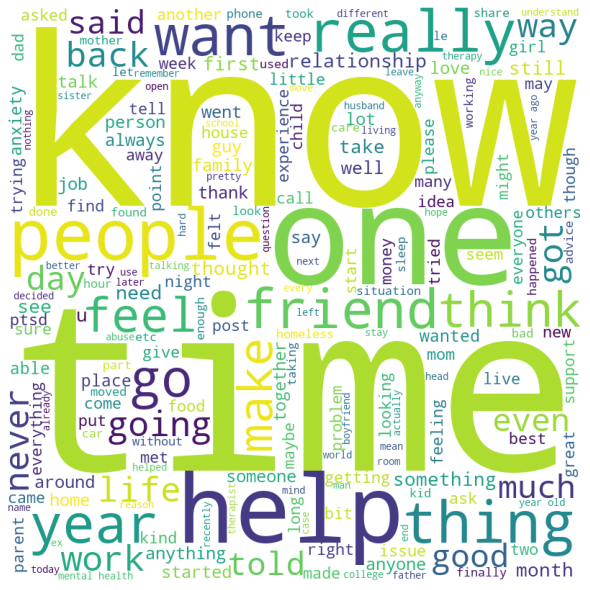

In [71]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [72]:
ys = ' '.join(stress_processed_text)

In [73]:
ys_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(ys)

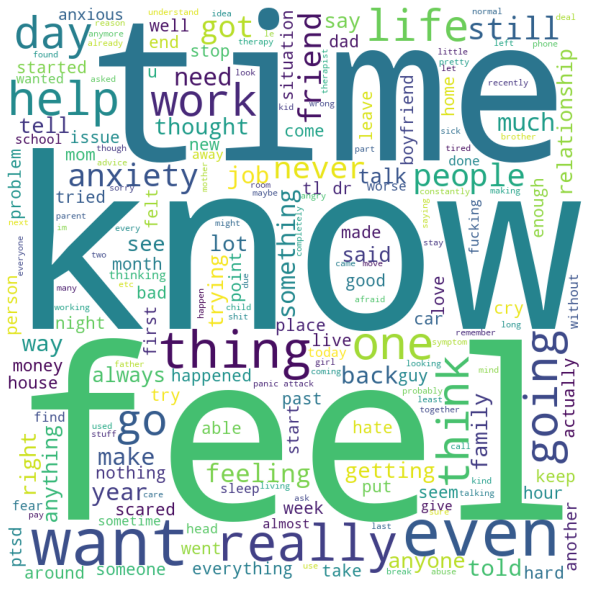

In [74]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(ys_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Word2Vec

In [75]:
import gensim


In [76]:
wv_model = gensim.models.Word2Vec(
    window = 10,
    min_count = 1,
    workers = 4
)

In [81]:
wv_model.build_vocab(wv_text_list, progress_per=1000)

In [82]:
wv_model.train(wv_text_list, total_examples = wv_model.corpus_count, epochs=wv_model.epochs)

(516336, 555340)

In [83]:
#should save model here
#model.save(saving location)

In [84]:
wv_model.wv.most_similar("ptsd")

[('symptom', 0.9999740123748779),
 ('child', 0.9999739527702332),
 ('many', 0.9999736547470093),
 ('etc', 0.9999724626541138),
 ('also', 0.9999720454216003),
 ('self', 0.9999709129333496),
 ('social', 0.9999700784683228),
 ('issue', 0.9999693036079407),
 ('tried', 0.9999692440032959),
 ('well', 0.9999691247940063)]

In [78]:
wnl = WordNetLemmatizer()
def wv_preprocessing(text):
    
    #step 2: tokenize
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenized_doc = nltk.regexp_tokenize(text, pattern)
    
    
    #step x: lower all cases and tokenize
    low_tokenized_doc = [word.lower() for word in tokenized_doc]
    
    
    #step 4: stop words
    custom_stop_words = ['r', 'url']
    stopwords_list = stopwords.words('english') + custom_stop_words
    stop_tokenized_doc = [word for word in low_tokenized_doc if word not in stopwords_list]
    
    #step 5: lem
    tokens = [wnl.lemmatize(word) for word in stop_tokenized_doc]
    
    return tokens

In [79]:
wv_list_to_proc = df['text'].tolist()
wv_text_list = []

for each_row in wv_list_to_proc:
    wv_text_list.append(wv_preprocessing(each_row))

In [80]:
wv_text_list

[['said',
  'felt',
  'way',
  'suggeted',
  'go',
  'rest',
  'trigger',
  'ahead',
  'youi',
  'hypocondriac',
  'like',
  'decide',
  'look',
  'feeling',
  'doom',
  'hope',
  'maybe',
  'getting',
  'sucked',
  'rabbit',
  'hole',
  'ludicrous',
  'conspiracy',
  'stupid',
  'psychic',
  'test',
  'new',
  'age',
  'b',
  'something',
  'could',
  'even',
  'laugh',
  'road',
  'ended',
  'reading',
  'sense',
  'doom',
  'indicative',
  'various',
  'health',
  'ailment',
  'one',
  'prone',
  'top',
  'doom',
  'gloom',
  "f'n",
  'worried',
  'heart',
  'happen',
  'physical',
  'hour'],
 ['hey',
  'assistance',
  'sure',
  'right',
  'place',
  'post',
  'go',
  "i'm",
  'currently',
  'student',
  'intern',
  'sandia',
  'national',
  'lab',
  'working',
  'survey',
  'help',
  'improve',
  'marketing',
  'outreach',
  'effort',
  'many',
  'school',
  'recruit',
  'around',
  'country',
  "we're",
  'looking',
  'current',
  'undergrad',
  'grad',
  'stem',
  'student',
  's

In [85]:
from gensim.models import Word2Vec
my_model = Word2Vec(wv_text_list, min_count = 2)

In [86]:
print(my_model)

Word2Vec(vocab=5549, size=100, alpha=0.025)


In [87]:
words = list(my_model.wv.vocab)

In [88]:
words

['said',
 'felt',
 'way',
 'go',
 'rest',
 'trigger',
 'ahead',
 'like',
 'decide',
 'look',
 'feeling',
 'doom',
 'hope',
 'maybe',
 'getting',
 'sucked',
 'rabbit',
 'hole',
 'stupid',
 'psychic',
 'test',
 'new',
 'age',
 'b',
 'something',
 'could',
 'even',
 'laugh',
 'road',
 'ended',
 'reading',
 'sense',
 'various',
 'health',
 'ailment',
 'one',
 'prone',
 'top',
 'worried',
 'heart',
 'happen',
 'physical',
 'hour',
 'hey',
 'assistance',
 'sure',
 'right',
 'place',
 'post',
 "i'm",
 'currently',
 'student',
 'national',
 'lab',
 'working',
 'survey',
 'help',
 'improve',
 'marketing',
 'effort',
 'many',
 'school',
 'around',
 'country',
 "we're",
 'looking',
 'current',
 'undergrad',
 'grad',
 'stem',
 'know',
 'would',
 'greatly',
 'appreciate',
 'take',
 'pas',
 'along',
 'short',
 'thank',
 'everyone',
 'entered',
 'drawing',
 'chance',
 'win',
 'three',
 'amazon',
 'mom',
 'hit',
 'newspaper',
 'shocked',
 'play',
 'hitting',
 'smacking',
 'violence',
 'sort',
 'person

## Vader

In [89]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [90]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [91]:
vader = SentimentIntensityAnalyzer()

In [92]:

for sentence in df['text']:
    vs = vader.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))
 

He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours. {'neg': 0.163, 'neu': 0.722, 'pos': 0.115, 'compound': -0.6897}
Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know S

thought, if its not going to listen to me talk, I'll send an easy to read article (they literally listed the differences in bullet points) and a video. Still ignored it. I've also adopted the Eleven's "no second chances" policy from Doctor Who. Later in the night, I sent a text that basically said told it to be more supportive and actively listen (communication, bitch), or I can't continue to be around it. I went to sleep and woke up to it saying, "fine, I guess we'll see other people, then!" {'neg': 0.06, 'neu': 0.824, 'pos': 0.116, 'compound': 0.5788}
Does anyone have any advice? I feel pretty hopeless right now. I want desperately to be with my partner, and I suspect even if our relationship ends I will always love and care for him very much. I don't want to spend my life wishing I was with him, but be too overcome with my anxiety and fear to do so. It is discouraging to feel as though my ex-boyfriend is still inside my head and controlling my life. {'neg': 0.179, 'neu': 0.72, 'pos'

I cook and clean every night and this is expected now. she berates my family (yeah my family is screwed up! but show me a family that isn't) and will freak out the moment I critiscise hers. she demanded I leave immediately this morning so had no time to pack belongings and arrange somewhere for myself and my cat to stay. today since being kicked out, just over 12 hours, I have received over 300 phone calls and over 1000 texts via all forms of communication. {'neg': 0.098, 'neu': 0.833, 'pos': 0.069, 'compound': -0.402}
Hey. I turned 18 two weeks ago, and this weekend, I was booted from my parents house. My uncle is nice enough to let me rent out one of his places, but after rent, and utilities, and gas to get to work, I don’t have anything left over. Problem is, the new place isn’t furnished, and I wasn’t allowed to take anything from my house except my clothes. So, if anyone could help me get furniture for my new place, I’d greatly appreciate it. {'neg': 0.038, 'neu': 0.86, 'pos': 0.1

If you're stuck and too anxious to move just know that you are always making progress. It's okay to do it in your own way. I'm so grateful to this sub- it was really amazing to see that I wasn't alone in this. Reading other's struggles and accomplishments inspired me beyond belief. So I hope that if you're reading this you can find your own inspiration. {'neg': 0.076, 'neu': 0.642, 'pos': 0.282, 'compound': 0.9564}
I just never had proper doctors who could diagnose me. There's a very long story there. I suffer from PTSD because I have been abused my entire life. I was physically abused by my teacher when I was 8 years old. My mother physically, mentally and emotionally abused me, up until I left her house at 16. {'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'compound': -0.9246}
I don't feel at all like he doesn't like me or has gone off me, we meet once a week and 'chat' daily but I'm kind of unhappy I'm not getting the 'cant get enough of talking' experience that usually comes along with b

I always sound like I’m about to cry. I get really hot and sweaty, my hearing starts to go. I had to stop in a presentation one time last semester to say “I’m sorry if I have pretty bad anxiety so if it looks like I’m about to pass out, please catch me” which was to keep it light and the class did laugh, but it was also a legitimate concern. Does anyone else experience this? Is this what social anxiety is? {'neg': 0.118, 'neu': 0.777, 'pos': 0.105, 'compound': 0.1179}
I know this goes a bit beyond /r/relationships, but I'm also asking for advice on how to deal with this as far as our relationship is concerned. What do I do?   ---   **tl;dr**: Girlfriend's violent, crazy ex-fiance is out of jail after beating up his grandparents, and I don't feel safe. What do I do? {'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'compound': -0.9511}
My cats were both inside, but this didn't stop my brain working overtime. I would even listen out to what passers-by were saying, in case they found a dead cat. I

I'm having problems with a friend and I thought an outsider's perspective might be useful. She's always been a bit overly emotional and controlling, having previously been very easy to anger, and having previously tracked me and an ex through my phone, and going through my belongings without my knowledge to check texts etc. It really worsened recently. Maybe a year or so arguments because a regular occurrence when we had been drinking. I've had to deal with taking care of her after outbursts like this on numerous occasions, the worst being a visit to the hospital when she stormed off and I found her in a parking lot, having fallen and hit their head. {'neg': 0.143, 'neu': 0.738, 'pos': 0.119, 'compound': -0.6547}
Two days ago I packed all of my clothes into my car and have started living out of it. I sleep in the parking lot at work, work for 8 hours, and then spend the day at Starbucks on the internet and charging my electronics. Once Thursday rolls around I will have ~$400, which is 

We met and it went really well - he's a super sweet, smart, and thoughtful kid (just like his dad). It turns out that the kid has (VERY recently - after I met his dad) been dealing with some mental health issues - he texted a friend that he was suicidal, and his parents have been scrambling to get him help because they are not sure if he has depression or something else. He's since started therapy and seems to be doing ok but obviously they are very concerned. I listened and was very supportive when he told me (I've dealt with my fair share of mentally ill family members) and I could tell he really appreciated it. We talked about it a few more times after that day. {'neg': 0.067, 'neu': 0.731, 'pos': 0.202, 'compound': 0.9493}
Tomorrow afternoon my four children and I are leaving my husband. After years of emotional neglected, financial control and recently added physical abuse towards my youngest. I'm scared that even after our planning we will be turned away from the refuge and have 

She didn’t have room for it where she was currently living, it had been so long since she was able to create. We moved things out of storage, into the studio. I was so excited to not only be providing this place for her but to be the one she trusted with some of the most precious things to her. I bought her a clay wheel and accessories, she wanted to work in the medium again. I’ll never forget the first evening we threw clay together, it was very meaningful and romantic. {'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.9705}
When we got to Food Lion, she got out of the car and said, “Your daddy bought you this car.” And slammed the car door and left. She apologized later. New Years eve, my mom (65) gets a call from my cousin (50-60 don’t know her age), the primary caregiver for my grandma, that my uncle (same uncle from earlier) was admitted to the hospital the day before and was ready to be released. She couldn’t pick him up because she lives an hour away. My mom and I picked him 

I know it’s terrible and selfish and obviously people can be friends with each other but I just miss having a really strong and healthy friendship with another girl the way that we did. I want to have a good weekend but it feels impossible now, and I want everyone there to have a good weekend and I don’t want to make it bad. I don’t know what to do. So I just feel like crawling into my little isolation hole and being sad by myself while knowing that everyone hates me... to be honest I don’t know why I’m overthinking it cause honestly no one would care if I did isolate myself. It’s just I want to be better, not just for other people but for myself too. {'neg': 0.149, 'neu': 0.584, 'pos': 0.267, 'compound': 0.9691}
The problem is that before I even ask for him to do this like a grown up, I have gone fully Zuko fire bender mode and decided to unleash my wrath on Joe for not doing this. Other stupid occasions I have done this? Well, did it cause when we were long distance he wouldn’t initi

I of course understand her wanting me to be safe, but I have an IUD and use condoms 100% of the time, which she knows because she pries about my sex life. She knows I'm sexually active and I don't have a boyfriend and is really judgmental about me having casual sex. I had a pregnancy scare last week (I'm not pregnant) and all I wanted was some advice from my mom and she used it as a way to make me feel bad about my sex life. When I was younger, she would constantly slut-shame me for things I hadn't even done, and made me feel so guilty about the idea of even having sex that I didn't have sex even with my year-long high school boyfriend because of this crippling guilt. Whenever we argue she makes it a time to critique my entire personality and not just my behavior in that argument or even within my relationship with her. {'neg': 0.126, 'neu': 0.832, 'pos': 0.042, 'compound': -0.9537}
But she's a nurse and works crazy hours, so it would just be too much for her, I think. I'm posting in c

It was my 21st birthday and a couple of friends came into town. We went out for dinner and I had 2-3 drinks. Afterwards, we smoked a bunch of pot. I am a regular smoker, but I smoked a decent amount that night so I was quite high. We decided to take the tram back, and that's when things started to feel weird. {'neg': 0.031, 'neu': 0.937, 'pos': 0.031, 'compound': 0.0}
I am just sick of this being my daily life. Between the derealization and the hypervigilance and paranoia even on good days I still don't feel like a person - and that's not even touching the flashbacks and nightmares. I don't know what to do anymore. I can't find a shrink who I trust or who seems equipped to help with the particular symptoms I have, and that seems like my only option. What do I do? {'neg': 0.083, 'neu': 0.788, 'pos': 0.128, 'compound': 0.6111}
I'm 18 and I'll be leaving home for the first time. At this point, you can see that my dad like to "collect" things but it not like our house looks like and episod

In [93]:
for sentence in processed_text:
    vs = vader.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

said felt way suggeted go rest trigger ahead hypocondriac like decide look feeling doom hope maybe getting sucked rabbit hole ludicrous conspiracy stupid psychic test new age b something could even laugh road ended reading sense doom indicative various health ailment one prone top doom gloom f'n worried heart happen physical hour {'neg': 0.329, 'neu': 0.464, 'pos': 0.207, 'compound': -0.8658}
hey assistance sure right place post go i'm currently student intern sandia national lab working survey help improve marketing outreach effort many school recruit around country we're looking current undergrad grad stem student stem student know stem student would greatly appreciate help take pas along short survey thank everyone help take survey entered drawing chance win one three amazon gc {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.9768}
mom hit newspaper shocked would know like play hitting smacking striking hitting violence sort person send vibe asking universe yesterday decided t

hard write attempting describe i've cut really deep spin flash pain tear deepest depression really feel kicked i'm already please forgive winded intro shaking writing style honestly taken week get point {'neg': 0.286, 'neu': 0.54, 'pos': 0.174, 'compound': -0.5859}
girlfriend major strain since last year took new job depressed mood swing half year always inverted melancholy feel new pressure pushed verge disaster tried talk responded negatively done anything help recent month said depressed need help told symptom another actually symptomatic {'neg': 0.311, 'neu': 0.593, 'pos': 0.097, 'compound': -0.8977}
abusive mother scared life started young age first time remember telling everyone scared would kill raised voice protest severely punished day lying sister relationship strained life recently opening neglect fat shaming experienced child {'neg': 0.58, 'neu': 0.42, 'pos': 0.0, 'compound': -0.9846}
essentially speaker ran people organization mayor state representative short film director

would like donate please go fundraising goal high struggling reach donation would much appreciated also see done far collect money click link donation welcome matter big small would also greatly appreciated could share {'neg': 0.061, 'neu': 0.52, 'pos': 0.419, 'compound': 0.9268}
pay tuition yet constantly put calling dumb anyone tip survive next week far i've playing super loud music headphone whenever try come say something i'm looking option le likely end going deaf haha tip quickly forge future without life would helpful i'm third year college hoping job graduate moment feel chained {'neg': 0.112, 'neu': 0.704, 'pos': 0.184, 'compound': 0.6671}
blame almost time especially feel bad see uncomfortable feeling wrong first place fault feel bad make feel worse feel worse hate hate hating feeling bad {'neg': 0.733, 'neu': 0.21, 'pos': 0.057, 'compound': -0.9886}
survey would like share u may please use following format failure result survey removed survey posted result ban length decided

talk make nice pretend ok feel unsettled edge around guess know complicated situation feel i'll never get real talk i'd like sort apology seems rather narcissistic bad father enough want admit wrong something get still around exaggerating {'neg': 0.241, 'neu': 0.522, 'pos': 0.237, 'compound': -0.296}
i'm new living car limited access cooking can't afford ice basis diet whole wheat bread eat peanut butter honey jam canned tuna vegetable bean lentil soup often eat canned peach mandarin orange green bean corn white pinto bean {'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'compound': -0.2263}
father diagnosed stage prostate cancer well controlled side effect hormonal chemo treatment left far emotional least unable sublimate depression anxiety anger vent available target anymore physical side effect forced early retirement meaning time he's home sitting livingroom he's longer directing vitriol venom used neither sister little thing invalidate feeling treating like live servant family member occa

told needed naked wanted see sexy body said lot sexual thing took clothes naked exposed lying bed stomach head pillow flipped sat foot bed put pillow face time becomes blur giving oral sex fingering telling hot {'neg': 0.111, 'neu': 0.753, 'pos': 0.136, 'compound': 0.2732}
long story short worked call centre year vehicle breakdown service starting able cope due combination thing change management enough staff constantly expanding customer base reward based whether face fit rather actual demonstrable achievement etc unable relax work constantly thinking dreading going work get random mood swing either intensely rageful wanting burst tear headache go day time regular occurence starting manifest physical way unable sleep constantly weary lot sickness usual {'neg': 0.117, 'neu': 0.771, 'pos': 0.111, 'compound': -0.1263}
also taking zoloft mg day plan start exercising nightly minute beginning tonight want alleviate symptom cure would love know i'm patient person illness really making fed po

considered small business know small business still required follow ada standard customer go employee really read anywhere right except can't fmla feel safer wear heavy coat work know look unprofessional bos constantly asks take unreasonable request accommodation able wear considered harassment make aware i'm wearing still ask take {'neg': 0.169, 'neu': 0.831, 'pos': 0.0, 'compound': -0.8455}
whenever reaction meltdown always try give shitty advice like think thing grateful i'm sorry therapy i've taken book help nothing anywhere say anything gratitude tends trigger say narcy mom would say tried explain asked read book got mad mind trying tell ungrateful help told important read book would help feel understood keep coming excuse excuse want read know anymore {'neg': 0.141, 'neu': 0.572, 'pos': 0.287, 'compound': 0.8176}
started unearthing old album gone back practising drum regularly watching movie reading book weirdly enough feel touch world continue along road abstinence see reason ju

In [94]:
processed_text[10]

'next week flying family vacation flight long msy la lax msy way home flying really trigger anxiety mostly like control surroundings idea metal tube foot air ideal also lot fear terrorist attack mass shooting movie theater crowded public place also problem wondering anyone tip flying anxiety fear'